# EDA данных

## Table of Contents

* [Импорт данных](#Импорт-данных)
* [Описание столбцов](#Описание-столбцов)
* [Анализ и визуализация данных](#Анализ-и-визуализация-данных)
* [Кодирование данных](#Кодирование-данных)


## Импорт данных

In [ ]:
!pip3 install geopandas
!pip3 install squarify

In [121]:
import numpy as np
import pandas as pd
from scipy import stats as sts   

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import squarify
import warnings
warnings.filterwarnings("ignore")

In [122]:
# Загружаем данные, полученные в результате парсинга
csv_file_path = "players.csv"
df = pd.read_csv(csv_file_path)

df

,Unnamed: 0,Name,Card Type,Nation,Club,League,Skills,W/F,W/R,Foot,...,Composure,Interceptions,Heading Acc.,Def. Awareness,Stand Tackle,Slide Tackle,Jumping,Stamina,Strength,Aggression
0,0,Lionel Messi,TOTS,Argentina,Paris SG,FRA 1,4,4,H/L,Left,...,99,47,82,24,41,28,84,86,84,54
1,1,Lionel Messi,TOTY,Argentina,Paris SG,FRA 1,4,4,H/L,Left,...,99,47,82,24,41,28,82,87,82,53
2,2,Pele,Icon,Brazil,Icons,ICO,5,4,H/M,Right,...,98,67,94,55,53,49,88,86,76,59
3,3,Victor Osimhen,TOTS,Nigeria,Napoli FC,ITA 1,4,5,H/M,Right,...,95,47,99,50,59,26,99,96,97,86
4,4,Rafael Leao,TOTS,Portugal,Milan,ITA 1,5,4,M/L,Right,...,93,36,93,33,36,31,80,95,97,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18991,9281,Wu Junjie,Non-Inform,China PR,Guangzhou City,CHN 1,2,3,M/M,Left,...,35,46,42,50,51,45,56,53,64,46
18992,9282,Zhang Jiahui,Non-Inform,China PR,Hebei FC,CHN 1,2,3,M/M,Right,...,43,40,49,40,45,46,51,43,54,51
18993,9283,Biswa Darjee,Non-Inform,India,Bengaluru FC,IND 1,2,3,H/M,Right,...,36,44,49,34,42,48,58,68,49,61
18994,9284,Asif Khan,Non-Inform,India,Mumbai City FC,IND 1,2,2,H/M,Right,...,55,20,36,35,34,33,60,34,34,41


In [123]:
# Удаляем индекс как несущественный признак
df = df.reset_index(drop=True)
df = df.drop(['Unnamed: 0'], axis=1)

In [124]:
df.describe()

,Skills,W/F,Age,Rating,PAC,SHO,PAS,DRI,DEF,PHY,...,Composure,Interceptions,Heading Acc.,Def. Awareness,Stand Tackle,Slide Tackle,Jumping,Stamina,Strength,Aggression
count,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000,18996.00000,18996.000000,18996.000000,18996.000000,18996.000000,...,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000,18996.000000
mean,2.681354,3.094441,26.429038,69.471415,70.954148,56.60039,61.205464,66.342335,54.165245,67.766425,...,64.408770,53.043904,59.687408,53.167246,54.665982,51.889608,68.164192,70.543272,68.414929,62.435881
std,0.739024,0.705731,6.264585,9.262336,12.150996,15.95629,12.034886,11.438193,17.114655,10.515311,...,12.362513,19.403290,13.407772,18.295949,19.323679,19.338894,12.832238,12.300312,13.031348,14.460146
min,0.000000,0.000000,0.000000,46.000000,28.000000,18.00000,26.000000,28.000000,15.000000,30.000000,...,30.000000,10.000000,21.000000,10.000000,10.000000,10.000000,29.000000,28.000000,27.000000,20.000000
25%,2.000000,3.000000,22.000000,63.000000,64.000000,45.00000,53.000000,59.000000,40.000000,61.000000,...,56.000000,38.000000,50.000000,39.000000,39.000000,35.000000,60.000000,63.000000,60.000000,53.000000
50%,3.000000,3.000000,26.000000,68.000000,71.000000,58.00000,60.000000,66.000000,58.000000,68.000000,...,64.000000,58.000000,59.000000,57.000000,60.000000,57.000000,69.000000,71.000000,70.000000,64.000000
75%,3.000000,3.000000,29.000000,75.000000,80.000000,67.00000,69.000000,73.000000,66.000000,75.000000,...,72.000000,67.000000,68.000000,66.000000,68.000000,66.000000,77.000000,79.000000,78.000000,73.000000
max,5.000000,5.000000,95.000000,98.000000,99.000000,99.00000,99.000000,99.000000,97.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [125]:
# Поиск дубликатов
df.duplicated().sum()

# Удаление дубликатов
df = df.drop_duplicates()

### Описание столбцов

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18974 entries, 0 to 18995
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            18974 non-null  object
 1   Card Type       18974 non-null  object
 2   Nation          18948 non-null  object
 3   Club            18974 non-null  object
 4   League          18974 non-null  object
 5   Skills          18974 non-null  int64 
 6   W/F             18974 non-null  int64 
 7   W/R             18974 non-null  object
 8   Foot            18944 non-null  object
 9   Age             18974 non-null  int64 
 10  Height          18974 non-null  object
 11  Weight          18974 non-null  object
 12  Body Type       18974 non-null  object
 13  Position        18974 non-null  object
 14  Alt. Position   18974 non-null  object
 15  Rating          18974 non-null  int64 
 16  PAC             18974 non-null  int64 
 17  SHO             18974 non-null  int64 
 18  PAS   

In [127]:
#посмотрим на получившиеся столбцы
df.columns 

Index(['Name', 'Card Type', 'Nation', 'Club', 'League', 'Skills', 'W/F', 'W/R',
       'Foot', 'Age', 'Height', 'Weight', 'Body Type', 'Position',
       'Alt. Position', 'Rating', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY',
       'Price', 'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing',
       'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision',
       'Crossing', 'FK. Acc.', 'Short Pass', 'Long Pass', 'Curve', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Dribbling', 'Composure',
       'Interceptions', 'Heading Acc.', 'Def. Awareness', 'Stand Tackle',
       'Slide Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression'],
      dtype='object')

In [128]:
''' 
'Name': Имя игрока.
'Card Type': Тип карты игрока.
'Nation': Нация игрока.
'Club': Клуб игрока.
'League': Лига игрока.
'Skills': Уровень навыков игрока.
'W/F': Уровень слабой ноги игрока.
'W/R': Работоспособность игрока в атаке/защите
'Foot': Предпочитаемая нога игрока.
'Age': Возраст игрока.
'Height': Рост игрока.
'Weight': Вес игрока.
'Body Type': Тип телосложения игрока.
'Position': Основная позиция игрока.
'Alt. Position': Альтернативная позиция игрока.
'Rating': Общий рейтинг игрока.
'PAC': Общий показатель скорости игрока.
'SHO': Общий показатель ударов игрока.
'PAS': Общий показатель пасов игрока.
'DRI': Общий показатель дриблинга игрока.
'DEF': Общий показатель защиты игрока.
'PHY': Общий показатель физической силы игрока.
'Price': Цена игрока.
'Acceleration': Показатель ускорения игрока.
'Sprint Speed': Показатель скорости игрока.
'Positioning': Показатель позиционирования игрока.
'Finishing': Показатель завершения игрока.
'Shot Power': Показатель силы удара игрока.
'Long Shots': Показатель дальних ударов игрока.
'Volleys': Показатель ударов с лёта игрока.
'Penalties': Показатель пенальти игрока.
'Vision': Показатель видения поля игрока.
'Crossing': Показатель прострелов игрока.
'FK. Acc.': Показатель точности ударов со свободных ударов игрока.
'Short Pass': Показатель коротких пасов игрока.
'Long Pass': Показатель дальних пасов игрока.
'Curve': Показатель кручёных ударов игрока.
'Agility': Показатель проворства игрока.
'Balance': Показатель равновесия игрока.
'Reactions': Показатель реакции игрока
'Ball Control': Показатель контроля мяча игрока.
'Dribbling': Показатель дриблинга игрока.
'Composure': Показатель спокойствия игрока.
'Interceptions': Показатель перехватов игрока.
'Heading Acc.': Показатель точности ударовголовы игрока.
'Def. Awareness': Показатель осведомленности в обороне игрока.
'Stand Tackle': Показатель стоячих отборов игрока.
'Slide Tackle': Показатель подкатов игрока.
'Jumping': Показатель прыжков игрока.
'Stamina': Показатель выносливости игрока.
'Strength': Показатель силы игрока.
'Aggression': Показатель агрессии игрока.
''' 
print()

##### Вывод 
- После анализа форматов столбцов, было замечено, что столбцы "Height" и "Weight" представлены в формате object
- Эти столбцы должны иметь формат int-64 и представлять из себя числовые признаки


In [129]:
# Посмотрим, почему в столце Height данные хранятся в формате object
df.Height.head()

0    5' 7"
1    5' 7"
2    5' 8"
3    6' 1"
4    6' 2"
Name: Height, dtype: object

In [130]:
# Приведем данные в столбце Height к числовому формату в дюймах
df['Height'] = df['Height'].str.replace("'", "").str.replace('"', '')
df['Height'] = df['Height'].apply(lambda x: round((int(x.split(' ')[0]) * 12 + int(x.split(' ')[1])))).astype(int)
df.Height.head()

0    67
1    67
2    68
3    73
4    74
Name: Height, dtype: int32

In [131]:
df['Height'].unique()

array([67, 68, 73, 74, 72, 77, 71, 69, 70, 76, 66, 65, 75, 64, 79, 78, 80,
       62,  0, 63, 61, 81])

In [132]:
# Посмотрим, почему в столце Weight данные хранятся в формате object
df['Weight'].head()

0    67kg
1    67kg
2    68kg
3    78kg
4    81kg
Name: Weight, dtype: object

In [133]:
# Приведем данные в столбце Weight к числовому формату в кг
df['Weight'] = df['Weight'].str.replace("kg", '').astype(int)
df['Weight'].head()

0    67
1    67
2    68
3    78
4    81
Name: Weight, dtype: int32

In [134]:
# Создадим столбец с суммой всех статистик игрока
df['Sum Of Stats'] = df.iloc[:, 23:].sum(axis = 1)

## Анализ пустых значений и обработка пропусков

In [135]:
# Посмотрим на пропуски
df.isna().sum()

Name               0
Card Type          0
Nation            26
Club               0
League             0
Skills             0
W/F                0
W/R                0
Foot              30
Age                0
Height             0
Weight             0
Body Type          0
Position           0
Alt. Position      0
Rating             0
PAC                0
SHO                0
PAS                0
DRI                0
DEF                0
PHY                0
Price              0
Acceleration       0
Sprint Speed       0
Positioning        0
Finishing          0
Shot Power         0
Long Shots         0
Volleys            0
Penalties          0
Vision             0
Crossing           0
FK. Acc.           0
Short Pass         0
Long Pass          0
Curve              0
Agility            0
Balance            0
Reactions          0
Ball Control       0
Dribbling          0
Composure          0
Interceptions      0
Heading Acc.       0
Def. Awareness     0
Stand Tackle       0
Slide Tackle 

In [136]:
# Заменим рабочую ногу на самое часто встречающееся значение
df['Foot'].fillna(df['Foot'].value_counts().index[0], inplace = True)

In [137]:
# В колонке 'Foot' встречается странное значение "REight" - заменим ег
df['Foot'].replace('REight', 'Right', inplace = True)
df['Foot'].value_counts()

Right    14105
Left      4869
Name: Foot, dtype: int64

In [138]:
# Сначала обработаем пропуски наций
df[df['Nation'].isnull()]

,Name,Card Type,Nation,Club,League,Skills,W/F,W/R,Foot,Age,...,Interceptions,Heading Acc.,Def. Awareness,Stand Tackle,Slide Tackle,Jumping,Stamina,Strength,Aggression,Sum Of Stats
1651,Akram Afif,Path to Glory,NaN,Qatar,WC,4,4,H/M,Right,25,...,35,63,37,47,37,82,85,60,44,2152
1895,Almoez Ali,World Cup Star,NaN,Qatar,WC,2,4,M/M,Right,26,...,27,99,29,17,26,98,79,93,66,2073
2911,Akram Afif,World Cup,NaN,Qatar,WC,4,4,H/M,Right,25,...,29,51,30,38,30,72,75,53,38,1950
3158,Almoez Ali,World Cup,NaN,Qatar,WC,2,4,M/M,Right,26,...,22,89,25,14,21,86,70,82,58,1820
3261,Boualem Khoukhi,World Cup,NaN,Qatar,WC,2,3,H/M,Right,32,...,74,80,78,76,73,93,83,85,73,2002
3287,Hassan Al Haydos,World Cup,NaN,Qatar,WC,3,3,M/H,Right,31,...,51,50,39,30,23,55,68,45,40,1902
3361,Karim Boudiaf,World Cup,NaN,Qatar,WC,3,3,M/M,Right,32,...,71,70,72,71,68,78,83,83,67,2020
3413,Abdulaziz Hatem,World Cup,NaN,Qatar,WC,3,5,H/M,Left,32,...,69,67,63,70,63,76,80,77,63,2067
3415,Abdelkarim Hassan,World Cup,NaN,Qatar,WC,2,3,H/H,Left,29,...,69,73,72,74,73,74,85,84,87,2109
3665,Mohammed Muntari,World Cup,NaN,Qatar,WC,3,4,M/M,Right,28,...,34,95,27,25,31,77,67,90,62,1796


Смотрим на игроков без нации, и понимаем, что по каким-то причинам FIFA не выводит данные о нации футболиста, если он из Катара.
Поэтому заменим пропуски на Qatar.

In [139]:
df['Nation'].fillna('Qatar', inplace=True)

In [140]:
# Посмотрим на нулевые значения
df.fillna(0, inplace = True)
(df == 0).sum()

Name                 0
Card Type            0
Nation               0
Club                 0
League               0
Skills               3
W/F                  3
W/R                  0
Foot                 0
Age                 42
Height              30
Weight              39
Body Type            0
Position             0
Alt. Position        0
Rating               0
PAC                  0
SHO                  0
PAS                  0
DRI                  0
DEF                  0
PHY                  0
Price             1790
Acceleration         0
Sprint Speed         0
Positioning          0
Finishing            0
Shot Power           0
Long Shots           0
Volleys              0
Penalties            0
Vision               0
Crossing             0
FK. Acc.             0
Short Pass           0
Long Pass            0
Curve                0
Agility              0
Balance              0
Reactions            0
Ball Control         0
Dribbling            0
Composure            0
Interceptio

In [141]:
# Мы не меняем цену, так как эти игроков можно было получить только выполнив специальные задания или пожертвовав других игроков
# Поэтому мы их отнесем в отдельную таблицу
no_trade_players = df[df['Price']==0]
df.dropna(inplace = True)

In [142]:
no_trade_players

,Name,Card Type,Nation,Club,League,Skills,W/F,W/R,Foot,Age,...,Interceptions,Heading Acc.,Def. Awareness,Stand Tackle,Slide Tackle,Jumping,Stamina,Strength,Aggression,Sum Of Stats
107,Gonzalo Montiel,Showdown Winner,Argentina,Sevilla FC,ESP 1,3,5,H/H,Right,25,...,91,84,90,90,88,94,99,85,99,2462
118,Serge Gnabry,TOTS Moments,Germany,FC Bayern Munchen,GER 1,4,4,H/M,Right,27,...,44,49,52,51,50,70,88,80,74,2366
120,Marco Reus,TOTS Moments,Germany,Borussia Dortmund,GER 1,4,5,H/M,Right,33,...,69,54,72,58,72,87,91,83,70,2482
129,Raul,Trophy Titans Icon,Spain,Icons,ICO,4,5,H/M,Left,44,...,42,98,46,43,35,92,89,80,62,2358
132,Frank Lampard,Trophy Titans Icon,England,Icons,ICO,3,4,H/M,Right,43,...,82,75,75,80,65,81,95,82,77,2456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16475,Keanin Ayer,FUT Swaps 1,South Africa,Sandefjord,NOR 1,2,2,M/M,Right,22,...,54,45,51,54,52,76,72,40,56,1605
16476,Abdoulaye Sylla,FUT Swaps 1,Guinea,RFC Seraing,BEL 1,2,3,M/M,Right,22,...,57,58,57,68,69,68,65,65,49,1386
16477,Ylan Gomes,FUT Swaps 1,France,Havre AC,FRA 2,3,3,M/M,Right,20,...,17,49,17,13,15,52,59,46,29,1465
16478,Harmanjot Khabra,FUT Swaps 1,India,Kerala Blasters,IND 1,2,3,M/M,Right,33,...,49,56,52,55,55,80,81,78,81,1636


Есть некоторые нули в весе, росте, возрасте и скиллах. Так как их мало, то чтобы они не портили нам данные, можно просто удалить их

In [143]:
df = df[~(df == 0).any(axis=1)]

In [144]:
(df == 0).sum()

Name              0
Card Type         0
Nation            0
Club              0
League            0
Skills            0
W/F               0
W/R               0
Foot              0
Age               0
Height            0
Weight            0
Body Type         0
Position          0
Alt. Position     0
Rating            0
PAC               0
SHO               0
PAS               0
DRI               0
DEF               0
PHY               0
Price             0
Acceleration      0
Sprint Speed      0
Positioning       0
Finishing         0
Shot Power        0
Long Shots        0
Volleys           0
Penalties         0
Vision            0
Crossing          0
FK. Acc.          0
Short Pass        0
Long Pass         0
Curve             0
Agility           0
Balance           0
Reactions         0
Ball Control      0
Dribbling         0
Composure         0
Interceptions     0
Heading Acc.      0
Def. Awareness    0
Stand Tackle      0
Slide Tackle      0
Jumping           0
Stamina           0


**Обработка альтернативных позиций:** Посмотрим на альтернативные позиции игроков

In [146]:
df['Alt. Position'].value_counts()

2      2981
CF     2445
CM     1570
RM     1336
RWB    1319
CDM    1183
LM     1117
LWB    1043
RB      841
CAM     660
3       568
LB      563
CB      418
RW      417
ST      270
LW      267
4       109
5        26
Name: Alt. Position, dtype: int64

Как-то нелогично все. Альтернативная позиция - это еще одна позиция в футболе, на которой игрок может играть так же хорошо, как и на своей основной позиции. Поэтому странно, что здесь появляются числа (нет числовых позиций в игре). Объяснение следующее: ввиду особенностей альтернативных позиций, они могут быть, а могут не быть у карточки. Поэтому когда их не было на странице карточки, то парсинг ошибочно брал значение количества звёзд на финтах за альтернативную позицию. Надо исправить эту ошибку: если альтернативные позиция равна числу, то поставим 0, имея в виду, что такой позиции нет, иначе 1+, если есть альтернативные позиции. Это понадобится для дальнейшей проверки гипотез

In [147]:
df['Alt. Position'] = np.where(df['Alt. Position'].isin(['0', '1', '2', '3', '4', '5']), '0', '1+')
df['Alt. Position'].value_counts()

1+    13449
0      3684
Name: Alt. Position, dtype: int64

__Анализ типов карточек__

In [148]:
df['Card Type'].value_counts()

Non-Inform                 14397
Libertadores Base            610
Sudamericana                 563
Inform                       540
Icon                         277
TOTS                         129
FUT Hero                      38
MOTM                          38
Winter Wildcard               35
Path to Glory                 34
Centurions                    32
Future Stars                  31
Rulebreakers                  30
FUT Birthday                  28
Fantasy FUT                   28
World Cup Hero                27
Trophy Titans Icon            25
TOTS Moments                  19
World Cup Phenoms             18
World Cup Stories             18
Road to World Cup             17
World Cup TOTT                17
World Cup Icon                16
FUT Birthday Icon             16
Fantasy FUT Hero              15
Ones To Watch                 15
Out of Position               15
Champions League RTTF         12
Champions League Live         12
TOTY                          11
Champions 

## Создание новых признаков

Видим, что чаще деление на типы карточек происходит не совсем точно. Дело в том, что в игре основное деление карточек происходит на 3 классификации: Золотые, Серебряные и Бронзовые карточки.  Такое деление происходит только на основе рейтинга карточки. А далее у карточки может быть любой тип, которые появляются уже при особых событиях в игре. Наш датафрейм учитывает именно тип карточкии, а не класс, причем класс тоже является достаточно важным признаком игрока, который даёт много дополнительной информации, которая сможем объяснить определённую разницу в ценности карточки. С такой классификацией будет удобно работать для создания проверки гипотез, поэтому создадим данный признак!

In [149]:
# Функция по условиям рейтинга карточки выдаёт его класс
def Card_Class(df):
    if df['Rating'] >= 75: res = 'Gold'        # Рейтинг >= 75: Золотая карточка
    elif df['Rating'] >= 65: res = 'Silver'    # Рейтинг <= 74 и Рейтинг >= 65: Серебряная карточка
    else: res = 'Bronze'                       # Рейтинг <= 64: Бронзовая карточка
    return res
        
# Создание нового признака    
df['Class'] = df.apply(Card_Class, axis = 1)
df['Class'].value_counts()

Silver    8017
Bronze    5835
Gold      3281
Name: Class, dtype: int64

Кроме того, можно сделать следующее замечание. Известно, что в футболе есть топ-5 сильнейших футбольных лиг: Высшая футбольная лига Испании, Франции, Италии, Германии и, конечно, Англии. Данные лиги считаются самыми престижными. Поэтому для дальнейшей проверки гипотез удобно будет ввести специальный признак, который бы отличал игроков из топ 5 лиг от тех, кто играет в других лигах. Не забываем, что существуют специальные карточки, которые называются Икона - это карточки футболистов, закончивших карьеру, но прославившихся за счёт высокого уровня игры и ставших легендами футболами. У данной категории игроков нет лиг, поэтому добавим для таких игроков отдельное значение признака.

In [150]:
# Функция по условиям рейтинга карточки выдаёт его класс
def Top5(df):
    # Топ-5 лиг
    top_5 = ['ENG 1', 'FRA 1', 'ITA 1', 'GER 1', 'ESP 1']

    if df['League'] in top_5: res = 'Top-5 league'             # У игроков из Топ-5: Значение = 1
    elif df['League'] == 'ICO': res = 'Icon'                   # У икон: Значение = 2
    else: res = 'Not top-5, not Icon'                          # У игроков нет из Топ-5: Значение = 0
    return res

df['Top5'] = df.apply(Top5, axis = 1)
df['Top5'].value_counts()

Not top-5, not Icon    13272
Top-5 league            3516
Icon                     345
Name: Top5, dtype: int64

Идём далее. Посмотрим, что с позициями наших игроков.

In [151]:
df['Position'].value_counts()

CB     3318
ST     2806
CM     2287
CDM    1533
LB     1166
RB     1158
CAM    1086
RM      942
LM      904
RW      555
LW      537
RWB     323
LWB     306
CF      212
Name: Position, dtype: int64

Позиции все правильно распределены, но есть один минус: они не показывают, в какой зоне играет футболист. Дело в том, что в игре есть большая разница между защитниками, полузащитниками и нападающими. Разные характеристики игроков имеют большее значение на цену в зависимости от зоны игры футболиста. Поэтому очень важно вывести отдельный признак, который бы указывал, этот игрок нападающий, полузащитник или защитник. Создадим этот признак.   

In [152]:
# Функция по условиям рейтинга карточки выдаёт его класс
def Zone(df):
    # Определяем, какие позиции соответствуют каждой зоне игры
    att = ['ST', 'CF', 'LW', 'RW']                  # Нападающие                  
    mid = ['CAM', 'CM', 'RM', 'LM', 'CDM']          # Полузащитники
    defs = ['LWB', 'LB', 'CB', 'RB', 'RWB']         # Защитники
    
    # Выводим res по условию
    if df['Position'] in att: res = 'ATT'            
    elif df['Position'] in mid: res = 'MID'         
    elif df['Position'] in defs: res = 'DEF' 
    return res

df['Zone'] = df.apply(Zone, axis = 1)
df['Zone'].value_counts()

MID    6752
DEF    6271
ATT    4110
Name: Zone, dtype: int64

## Анализ и визуализация данных

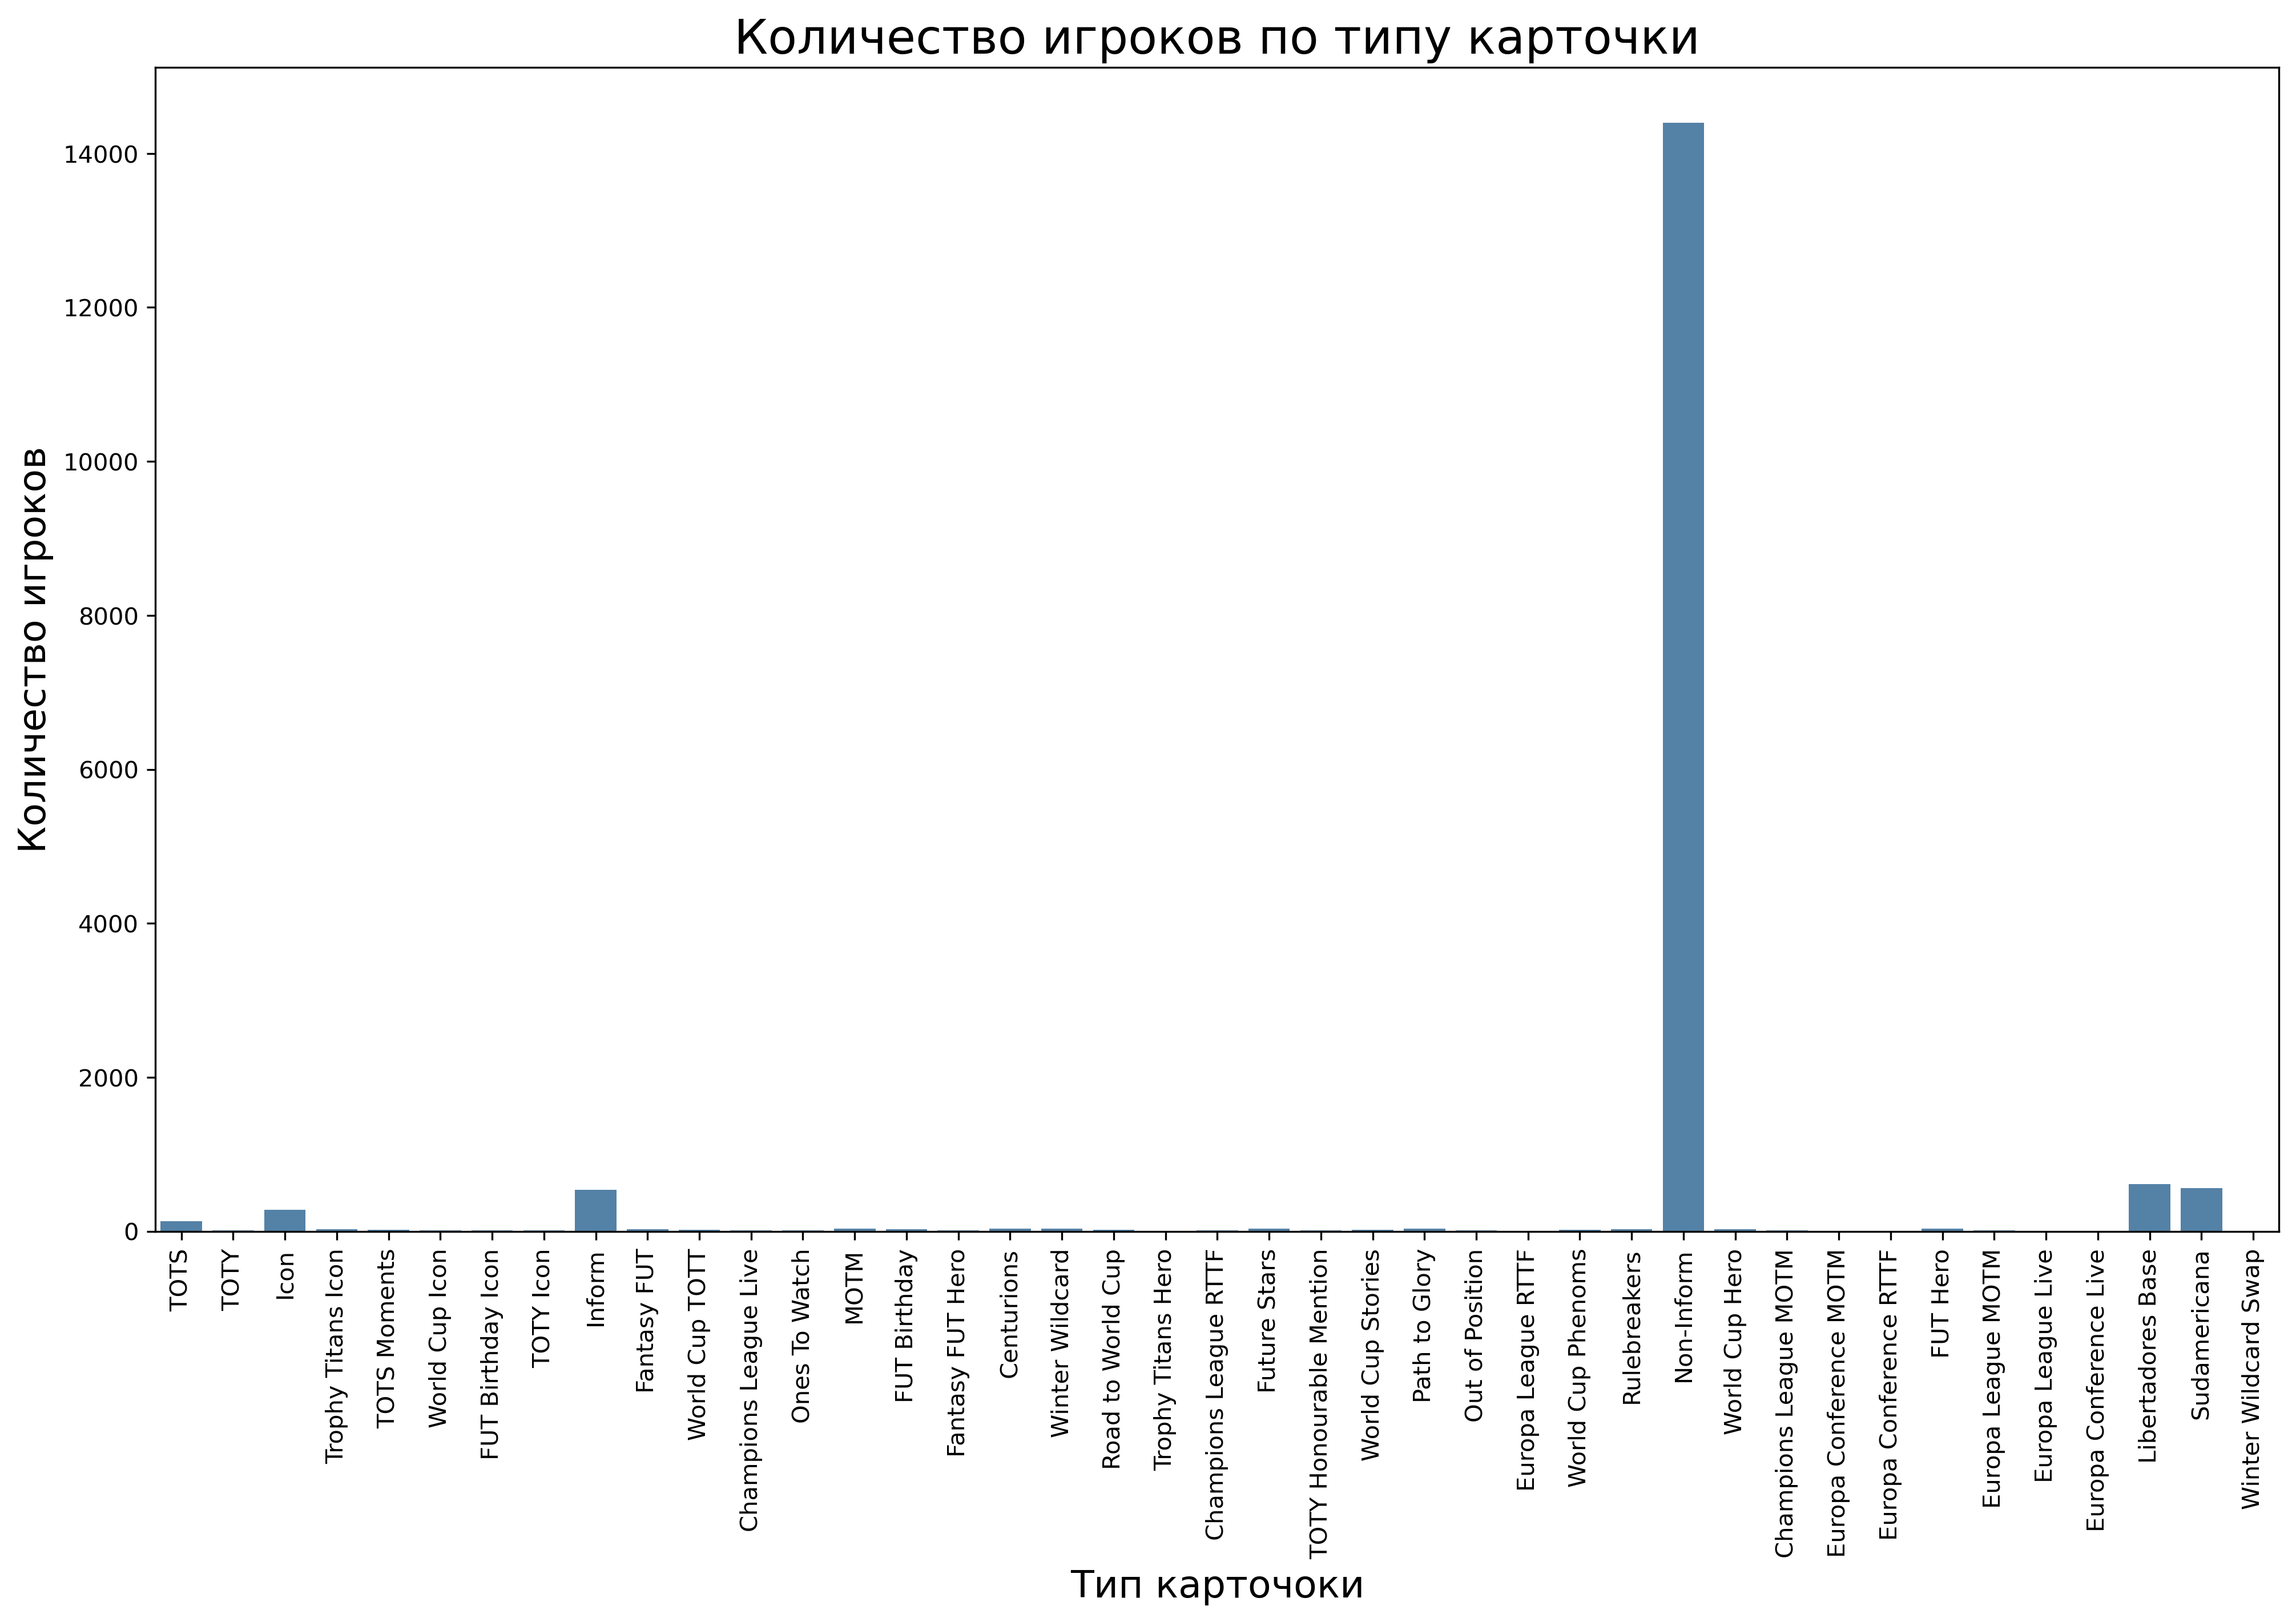

In [269]:
#Построим график, показывающий количество игроков в зависимости от типа карточки


plt.figure(figsize=(16,9), dpi=300)
sns.countplot(data=df, x='Card Type', color='steelblue')
plt.title('Количество игроков по типу карточки', fontsize=20)
plt.xlabel('Тип карточоки', fontsize=16)
plt.ylabel('Количество игроков', fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Вывод
- Больше всего игроков с типами карточек "Non-Inform", а далее идут "Inform", "Libertadores Base", "Sudamericana". Так, мы понимаем, что больше всего в игры обычных карточек
- Инфрмация полезна для понимания, но она не поможет нам предсказать цены игроков. Поэтому необходимо посмотреть, как тип карточки влияет на цену

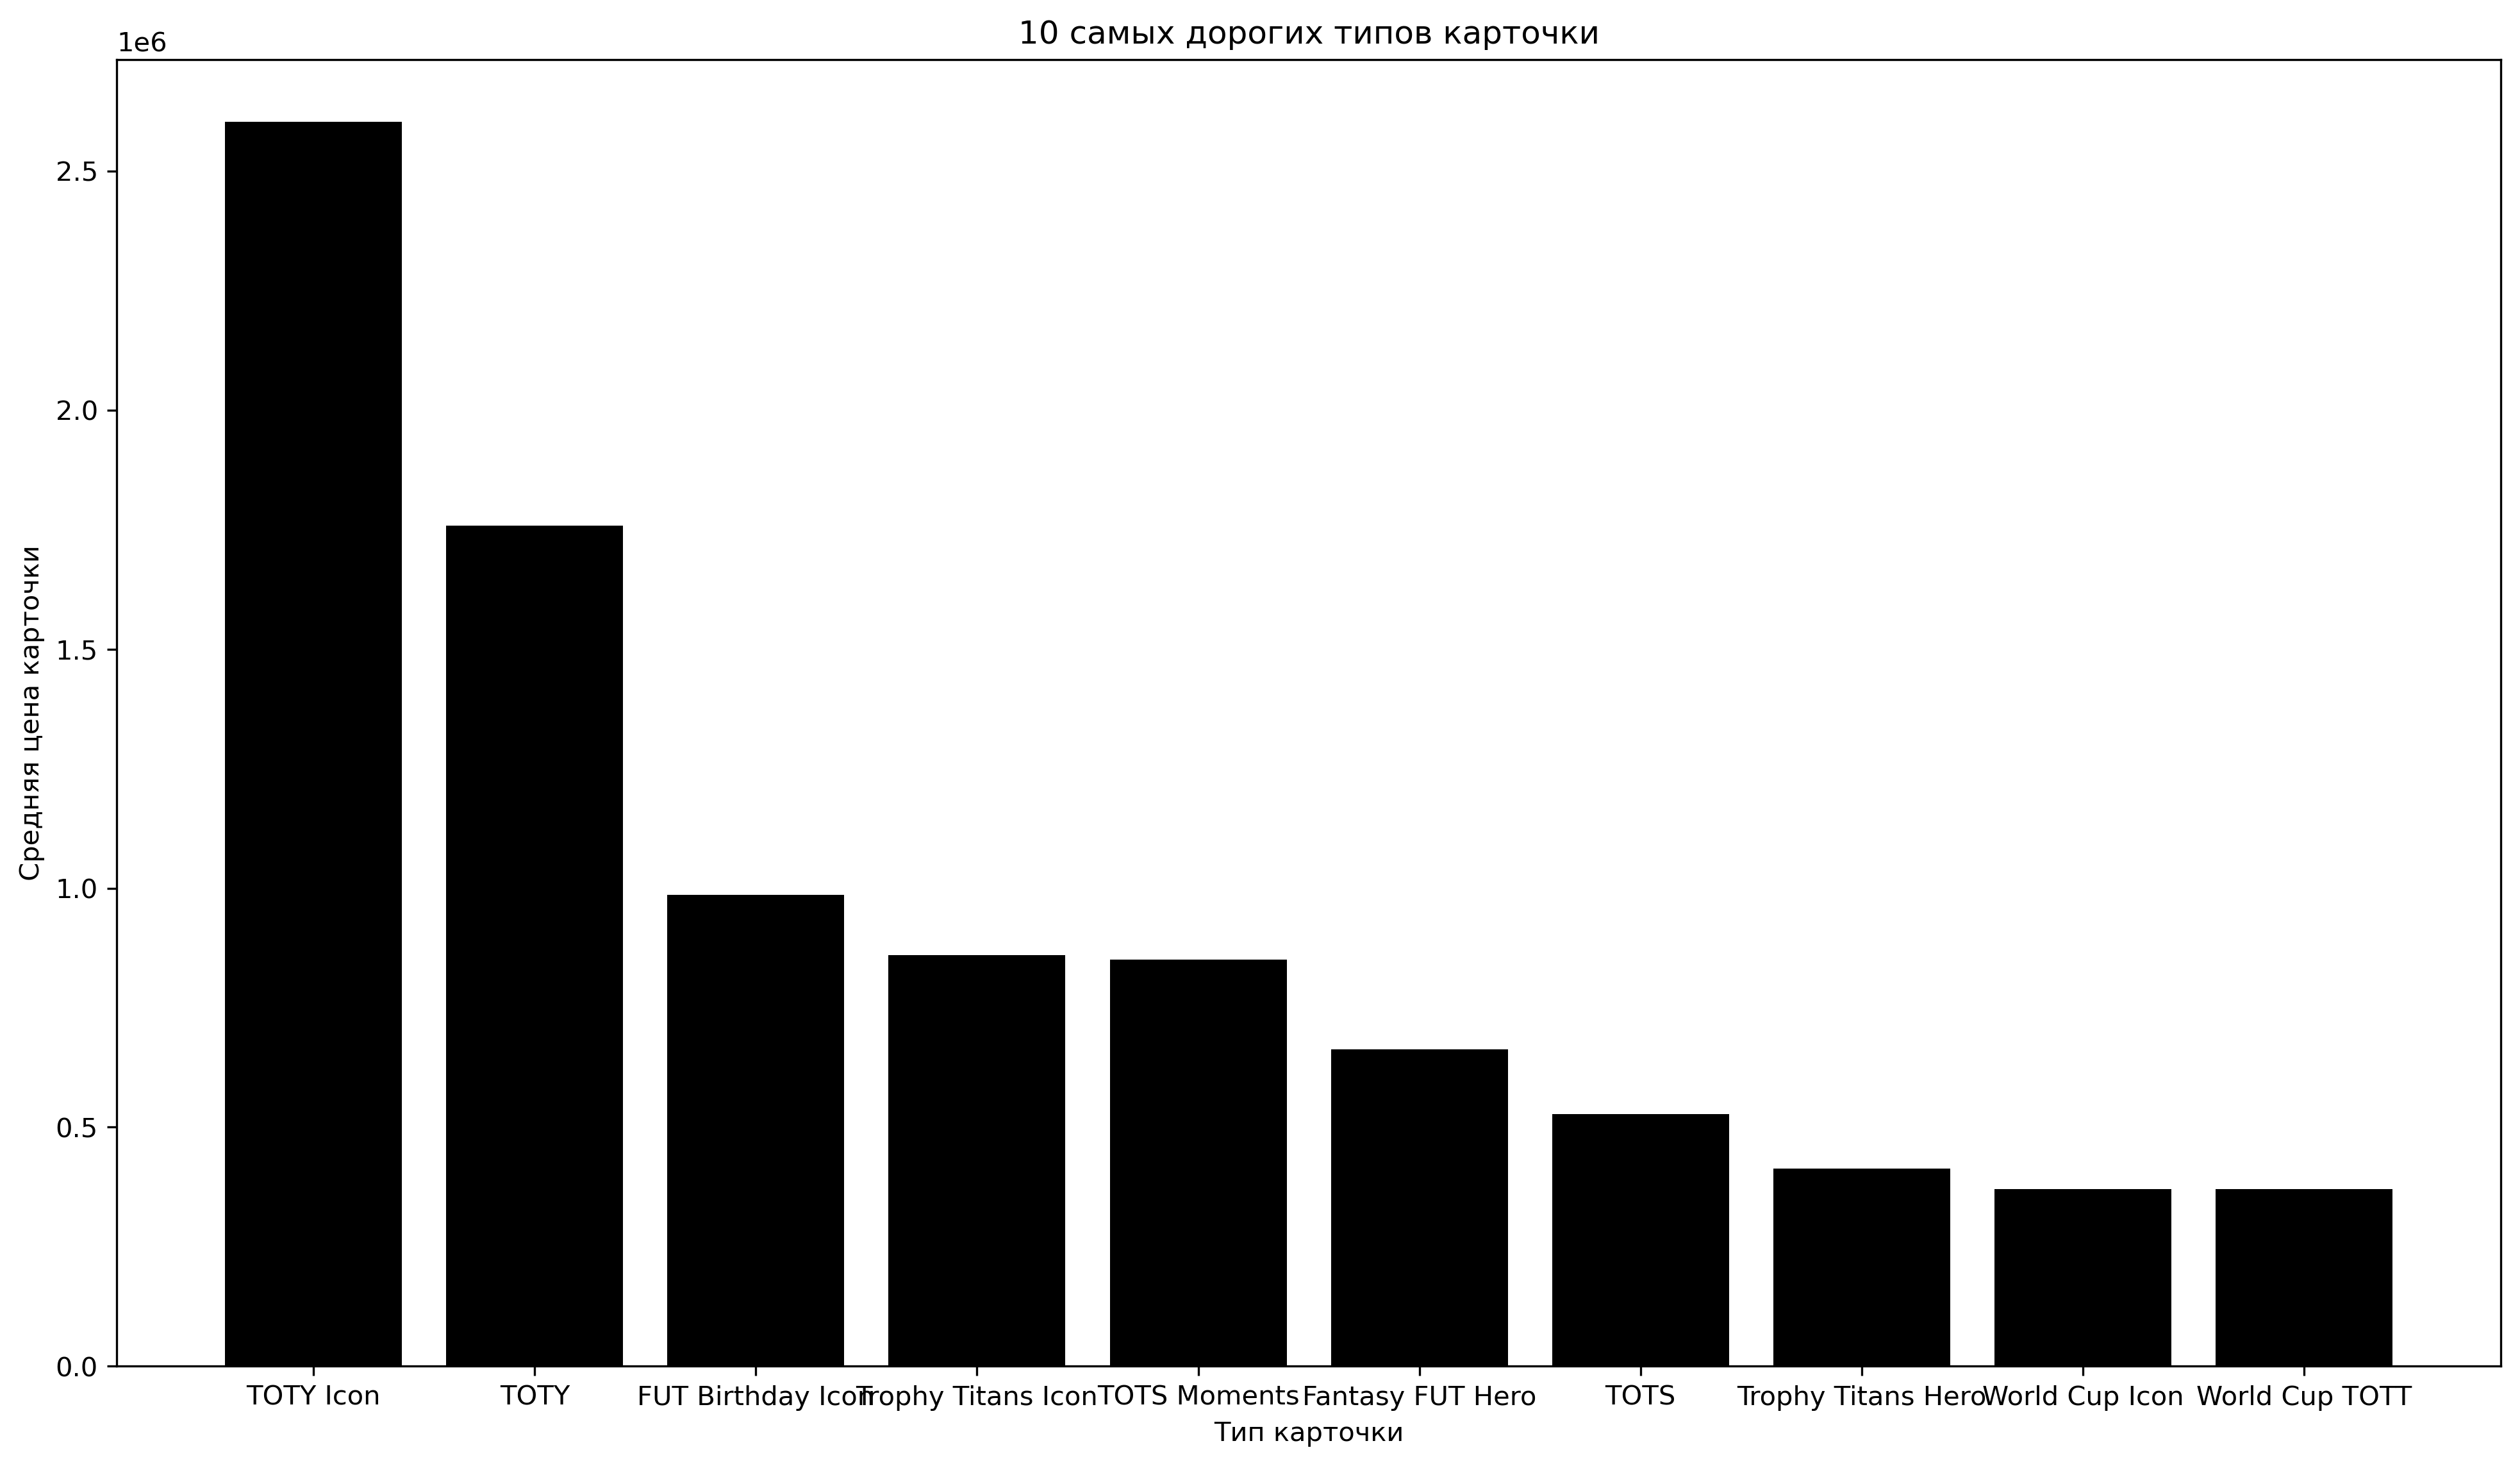

In [191]:
# Создаем сгруппированные данные по средним
groub_by_cards = df.groupby('Card Type')[['Price']].mean().sort_values(by='Price', ascending=False).reset_index()

# Выводим столбчатую диаграмму
plt.figure(figsize=(16,9), dpi=300)
plt.bar(groub_by_cards['Card Type'][:10], groub_by_cards['Price'][:10], color='black')
plt.xlabel('Тип карточки')
plt.ylabel('Средняя цена карточки')
plt.title('10 самых дорогих типов карточки');

#### Вывод
- Количество карточек конкретного типа ничего не говорит о его ценности
- На диаграмме отчётливо видно, что самые дорогие игроки в игре - это либо цветные карточки современных футболистов, либо же карточки икон. Исходя из этого мы выдвигаем следующую гипотезу, которую впоследствии проверим: цены на цветные карточки футболистов равны ценам на карточки икон

Построим график количества игроков по каждой нации (визуализируем на карте мира)

In [154]:
# Загрузка базы данных по странам с их местоположением на карте
warnings.filterwarnings("ignore")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

# Некоторые нацинальности указывают регион страны, а не название страны - исправим это
df['Nation'].replace('England', 'United Kingdom', inplace = True)
df['Nation'].replace('Scotland', 'United Kingdom', inplace = True)
df['Nation'].replace('Northern Ireland', 'United Kingdom', inplace = True)
df['Nation'].replace('Wales', 'United Kingdom', inplace = True)
df['Nation'].replace('United States', 'United States of America', inplace = True)
df['Nation'].replace('China PR', 'China', inplace = True)

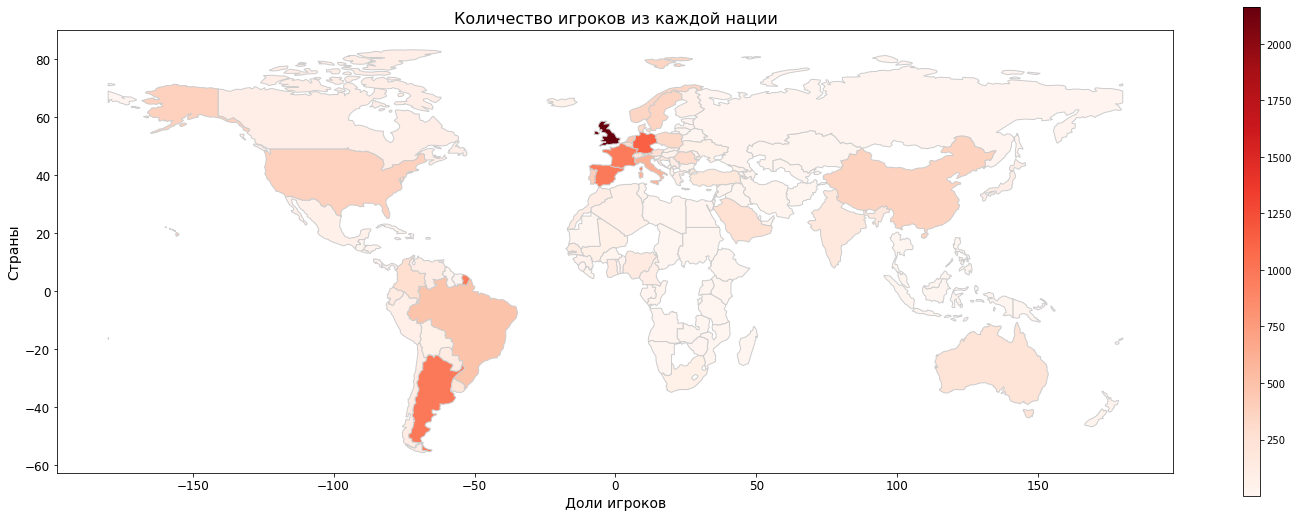

In [155]:
nation_counts = df['Nation'].value_counts() # Подсчет статистики по распределению национальностей игроков
merged = world.merge(nation_counts, left_on='name', right_index=True) # Объединение статистики по игрокам и расположения стран

# Построение карты
fig, ax = plt.subplots(figsize=(25, 15))
merged.plot(column='Nation', cmap='Reds', ax=ax, edgecolor='0.8', legend=True,
            legend_kwds={'shrink': 0.6, 'aspect': 30}) # Настройка размера легенды справа

# Обозначения на карте
ax.set_title('Количество игроков из каждой нации', fontsize=16)
ax.set_xlabel('Доли игроков', fontsize=14)
ax.set_ylabel('Страны', fontsize=14)
ax.tick_params(axis='both', labelsize=12)

plt.show()

- Карта показывает, что футболистов больше всего с Европы и Южной Америки (конкретнее, Аргентина и Бразилия)

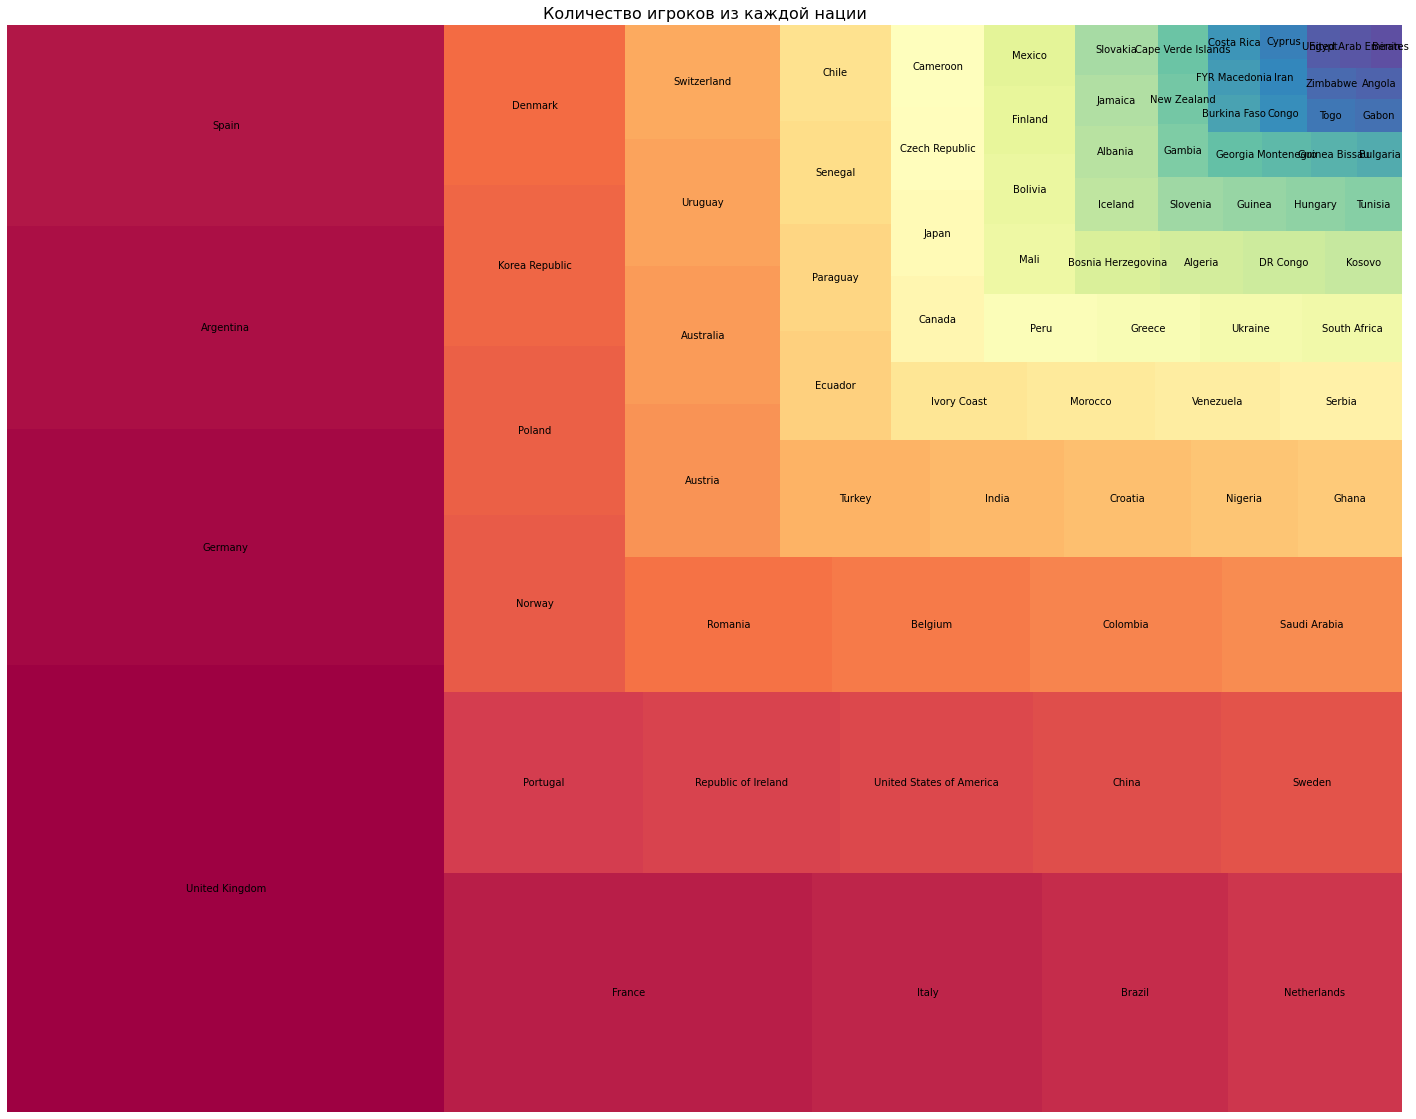

In [156]:
#Построим график количества игроков по каждой нации

min_count = 15 # минимальное число игроков страны, при котором страна будет видна на карте
filtered_nation_counts = nation_counts[nation_counts >= min_count]

sizes = filtered_nation_counts.values # массив значений
labels = filtered_nation_counts.index # массив индексов
colors = plt.cm.Spectral(np.linspace(0, 1, len(labels))) # палитра цветов

fig, ax = plt.subplots(figsize=(25, 20))
squarify.plot(sizes=sizes, label=labels,color=colors)

# Настройка внешнего вида
plt.axis('off')
plt.title('Количество игроков из каждой нации', fontsize=16)
plt.show()

#### Вывод
- Как можно видеть, уровень чемпионата и национальной сборной прямо коррелирует с количеством игроков в Fifa у данной страны
- В свою очередь уровень чемпионата и сборной по нашим предположениям должен иметь влияение на цену карточки. Давайте проверим данное предположение

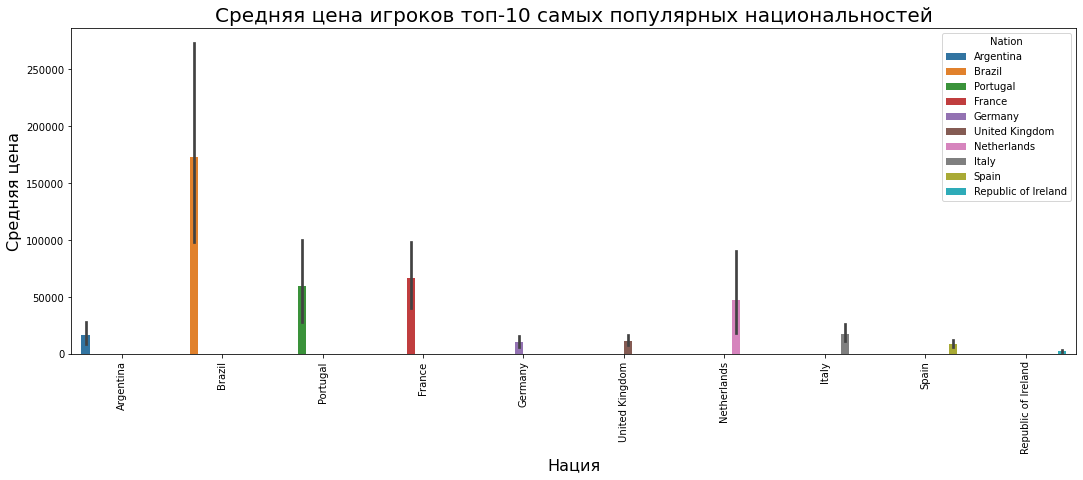

In [157]:
# Построим график средней цены игроков топ-10 самых популярных национальностей

plt.figure(figsize=(18, 6))
sns.barplot(x='Nation', y='Price', hue='Nation', estimator= np.mean, 
            data=df[(df['Nation'].isin(df['Nation'].value_counts().index[:10].to_list()))])
plt.title('Средняя цена игроков топ-10 самых популярных национальностей', fontsize=20)
plt.xlabel('Нация', fontsize=16)
plt.ylabel('Средняя цена', fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Вывод

- **Одним из важных факторов при формировании цены игрока является его национальность**. Это отчётливо видно на графике. Так, например, средняя цена бразильцев, французов, португальцев и иных национальностей по игровым меркам очень высока
- Исходя из графиков выше можно сформулировать следующую гипотезу: средняя цена футболистов прямо коррелирует с количеством игроков в стране. Далее мы проверим эту гипотезу с помощью корреляции Спирмена.  

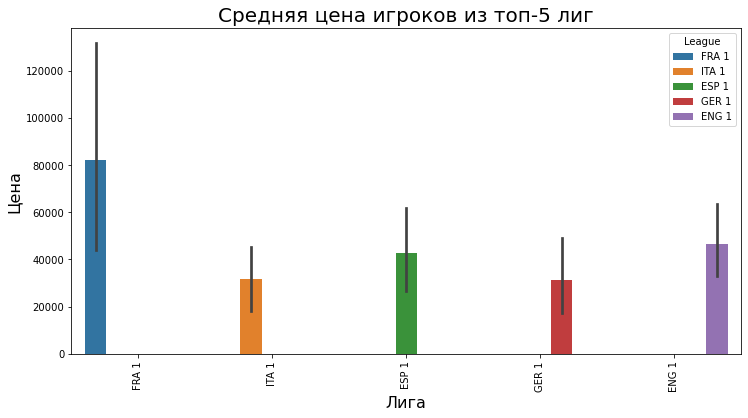

In [158]:
# Построим график средней цены игроков топ-5 лиг

plt.figure(figsize=(12, 6))
sns.barplot(x='League', y='Price', hue='League', estimator= np.mean, data=df[df['League'].isin(['ENG 1', 'FRA 1', 'ITA 1', 'GER 1', 'ESP 1'])])
plt.title('Средняя цена игроков из топ-5 лиг', fontsize=20)
plt.xlabel('Лига', fontsize=16)
plt.ylabel('Цена', fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Вывод
- **Одним из важных факторов при формировании цены игрока является его лига**, ведь, как видим, средняя цена игроков любой из данных 5 лиг намного выше обычной цены игроков 
- Исходя из данного наблюдения, далее мы будем проверять гипотезу о равенстве средних игроков из топ-5 лиг и не из топ-5 лиг.

Перейдём к сравнению характеристик самих игроков. Начнём с выявления взаимосвязей между показателями роста, скорости, физической силы и цены игроков

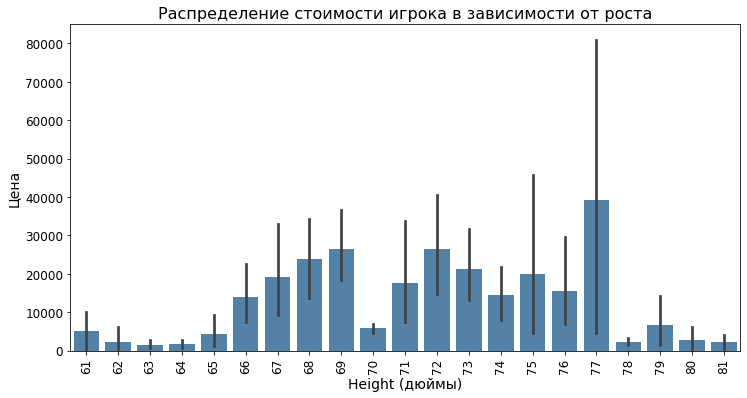

In [160]:
# Построим график распределения стоимости игрока в зависимости от роста

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Height', y = 'Price', color='steelblue', estimator = np.mean)
plt.title('Распределение стоимости игрока в зависимости от роста', fontsize=16)
plt.xlabel('Height (дюймы)', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Вывод
- Исходя из графика можно увидеть, что рост игрока скорее всего не является важным признаком при формировании цены игрока. На графике заметно много выбросов. 
- В среднем, игроки начинают дорожать при росте от 66 до 77 дюймов, а слишком низкие или слишком высокие футболисты в среднем очень дешёвые. 

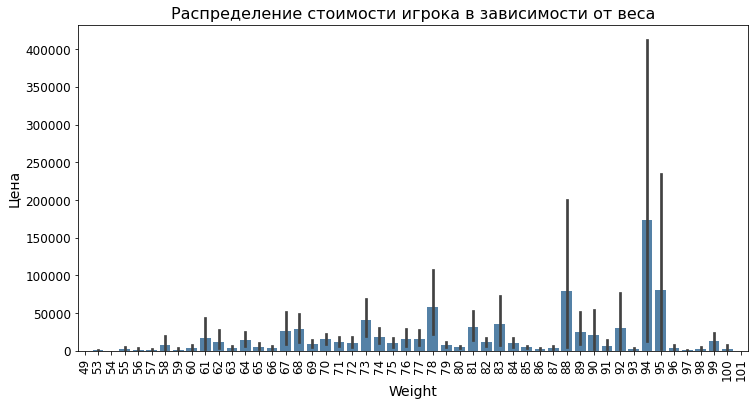

In [161]:
# Построим график распределения стоимости игрока в зависимости от веса

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Weight', y = 'Price', color='steelblue', estimator = np.mean)
plt.title('Распределение стоимости игрока в зависимости от веса', fontsize=16)
plt.xlabel('Weight', fontsize=14)
plt.ylabel('Цена', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Вывод
- Исходя из графика можно увидеть, что вес игрока скорее всего не является важным признаком при формировании цены игрока. На графике заметно много выбросов, но не видно тренда. Поэтому нельзя сделать однозначный вывод о наличие связи между весов и ценой футболиста

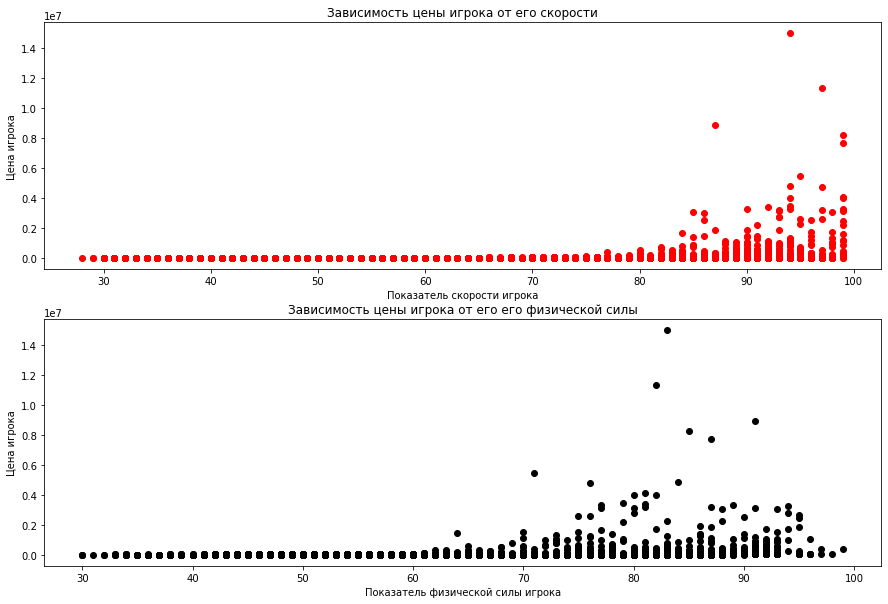

In [162]:
# Проверим, как влияют самые известные характеристики игроков в Fifa (сила и скорость) на цену карточек  

fig, ax = plt.subplots(2, 1, figsize=(15, 10))

ax[0].scatter(x=df['PAC'], y=df['Price'], color='red')
ax[0].set_xlabel('Показатель скорости игрока')
ax[0].set_ylabel('Цена игрока')
ax[0].set_title('Зависимость цены игрока от его скорости')

ax[1].scatter(x=df['PHY'], y=df['Price'], color='black')
ax[1].set_xlabel('Показатель физической силы игрока')
ax[1].set_ylabel('Цена игрока')
ax[1].set_title('Зависимость цены игрока от его его физической силы');

#### Вывод
- Исходя из графика можно увидеть, видеть если значения данных показатель достаточно высокие, то вероятность, что данная карточка будет дороже в среднем увеличивается. 
- Наблюдения выше наталкивают нас следующую гипотезу: есть группа умеренно низких футболистов, которые зачастую и являются быстрыми просто по природе, а есть группа высоких и физически сильных футболистов, и исходя из результатов диаграммы рассеяния хочется сделать вывод, что высокие (90+) значения скорости сильнее влияют на цену футболистов, чем высокие значения физической силы, так как визуально кажется, что точки на диаграмме рассеяния скорости лежат выше, чем на диаграмме рассеяния силы. Далее мы проверим данную гипотезу с помощью специальных тестов.

Далее посмотрим на то, как бинарные признаки влияет на цены наших карточек. В нашем датасете два таких признака: ведущая нога и наличие альтернативной позиции

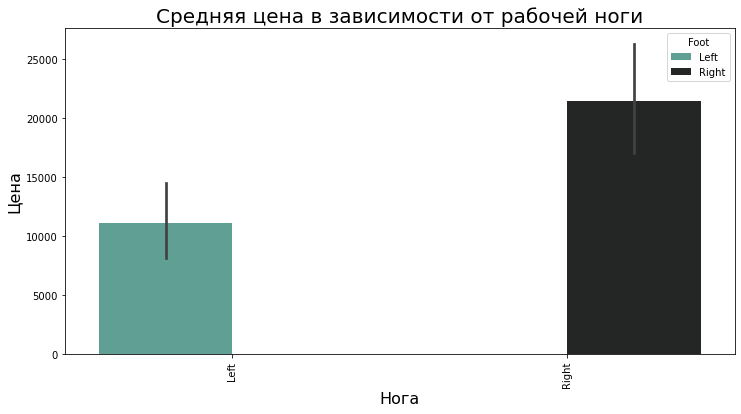

In [266]:
# Визуализация статистики по ведущей ноге у различных игроков

plt.figure(figsize=(12, 6))
sns.barplot(x='Foot', y='Price', hue='Foot', estimator=lambda x: sum(x)/len(x), data=df, palette="dark:#5A9_r")
plt.title('Средняя цена в зависимости от рабочей ноги', fontsize=20)
plt.xlabel('Нога', fontsize=16)
plt.ylabel('Цена', fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Вывод
- Исходя из графика можно увидеть, что игроки с ведущей правой ногой стоят дороже, но вряд-ли это будет одним из важнейших признаков, ввиду того что правоногих футболистов больше по своей природе, и поэтому большинство футболистов, в том числе лучших и самые дорогих, именно правоногие, но никакой практической ценности данный фактор не придаёт игрокам.

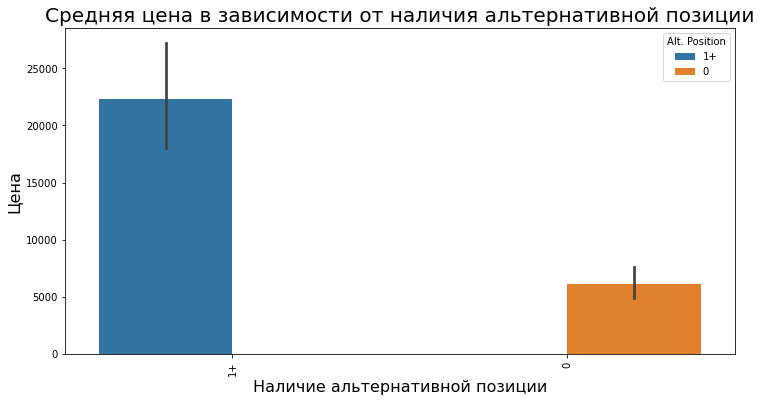

In [262]:
# Визуализация статистики по ведущей наличию альтернативной позиции у различных игроков

plt.figure(figsize=(12, 6))
sns.barplot(x='Alt. Position', y='Price', hue='Alt. Position', estimator=lambda x: sum(x)/len(x), data=df)
plt.title('Средняя цена в зависимости от наличия альтернативной позиции', fontsize=20)
plt.xlabel('Наличие альтернативной позиции', fontsize=16)
plt.ylabel('Цена', fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Вывод
- Исходя из графика можно увидеть, что игроки с альтернативной позицией стоят в среднем выше, чем игроки без второй позиции. В отличие от случая с ведущей ногой, здесь у данного наблюдения есть логическое объяснение, и, как видим, визуализации не противоречит нашим предположениям, что игроки с альтернативной позицией лучше, и поэтому стоят выше. Далее мы подробнее остановимся на проверке этой гипотезы с помощью z теста 

Для следующей визуализации нам понадобится созданный нами признак, а именно: зона игры футболиста. Здесь необходимо выявить: какая позиция игры самая дорогая

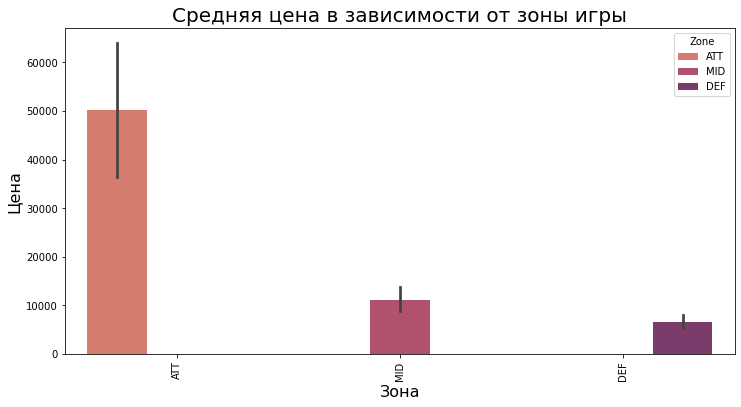

In [264]:
# Визуализация статистики зональной позиции игроков

plt.figure(figsize=(12, 6))
sns.barplot(x='Zone', y='Price', hue='Zone', estimator=lambda x: sum(x)/len(x), data=df, palette = "flare")
plt.title('Средняя цена в зависимости от зоны игры', fontsize=20)
plt.xlabel('Зона', fontsize=16)
plt.ylabel('Цена', fontsize=16)
plt.xticks(rotation=90)
plt.show()

**Вывод:** 
- Исходя из графика, отчётливо видно, что нападающие в Fifa стоят ощутимо дороже, чем полузащитники и защитники
- Наша гипотеза: нападающие стоят дороже полузащитников и защитников. Далее мы более полно проверим данную гипотезу на разных подвыборках, что даст более точное представление о существенности зоны игры футболиста 

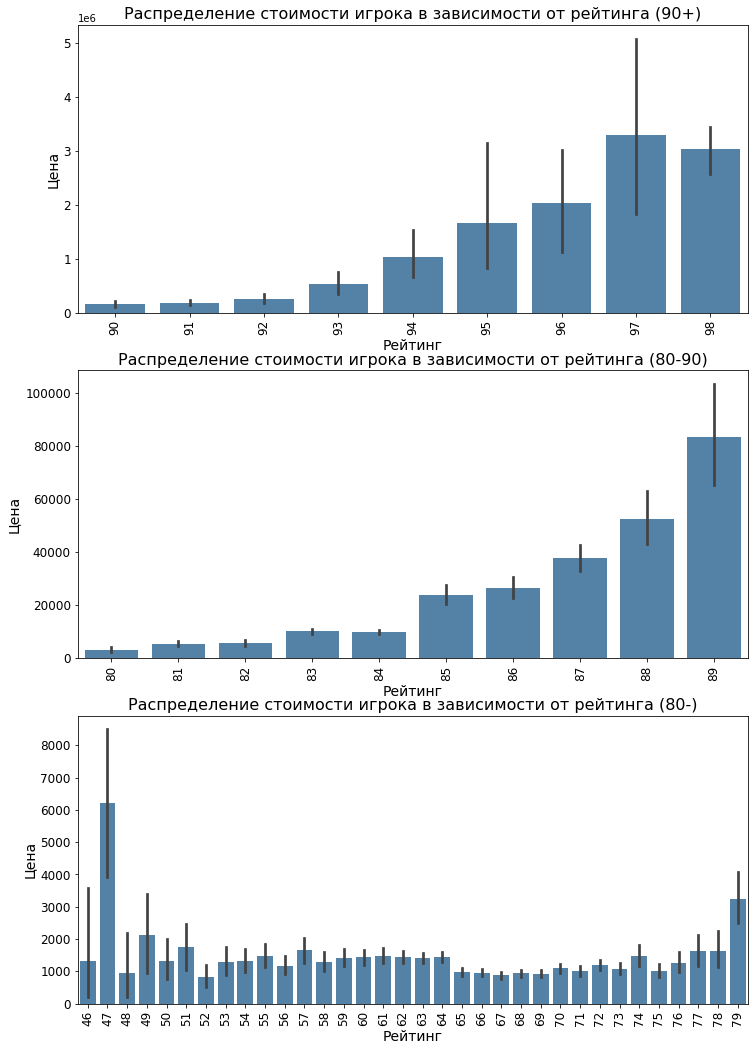

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Создание subplot с 3 строками и 1 столбцом
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Rating >= 90
sns.barplot(data=df[df['Rating'] >= 90], x='Rating', y='Price', color='steelblue', estimator=np.mean, ax=axs[0])
axs[0].set_title('Распределение стоимости игрока в зависимости от рейтинга (90+)', fontsize=16)
axs[0].set_xlabel('Рейтинг', fontsize=14)
axs[0].set_ylabel('Цена', fontsize=14)
axs[0].tick_params(axis='x', rotation=90, labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)

# 80 < Rating < 90
sns.barplot(data=df[(df['Rating'] < 90) & (df['Rating'] >= 80)], x='Rating', y='Price', color='steelblue', estimator=np.mean, ax=axs[1])
axs[1].set_title('Распределение стоимости игрока в зависимости от рейтинга (80-90)', fontsize=16)
axs[1].set_xlabel('Рейтинг', fontsize=14)
axs[1].set_ylabel('Цена', fontsize=14)
axs[1].tick_params(axis='x', rotation=90, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)

# Rating <= 80
sns.barplot(data=df[df['Rating'] < 80], x='Rating', y='Price', color='steelblue', estimator=np.mean, ax=axs[2])
axs[2].set_title('Распределение стоимости игрока в зависимости от рейтинга (80-)', fontsize=16)
axs[2].set_xlabel('Рейтинг', fontsize=14)
axs[2].set_ylabel('Цена', fontsize=14)
axs[2].tick_params(axis='x', rotation=90, labelsize=12)
axs[2].tick_params(axis='y', labelsize=12)

plt.show()

#### Вывод
- **Одним из важных признаков при формировании цены игрока является его рейтинг**. Причем общий рейтинг начинает положительно коррелировать с ценой при значении рейтинга 85+
- Исходя из графика можно сформировать одну из гипотез, которую мы впоследствии проверим: рейтинг игрока влияет на цену карточки 

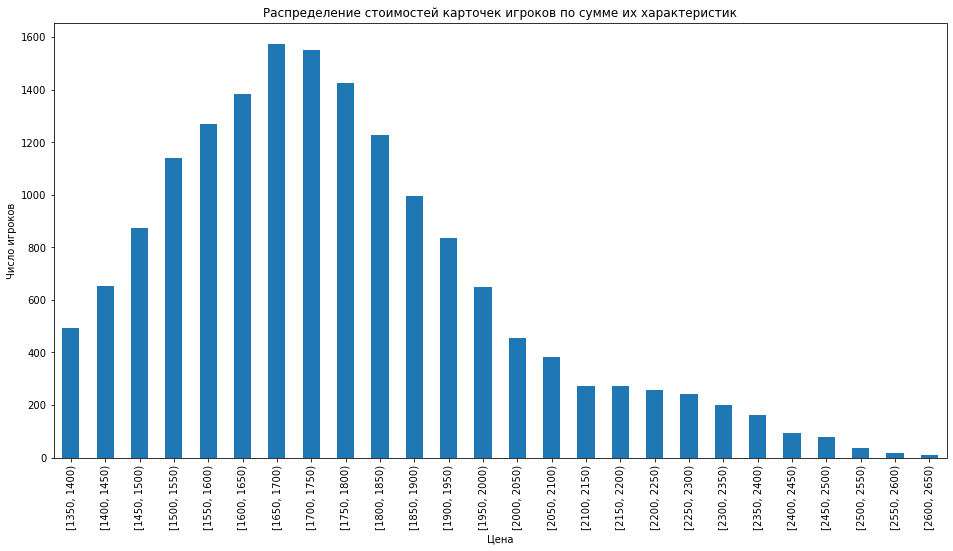

In [164]:
# Построим график распределения суммы характеристик карточек игроков
plt.figure(figsize=(16, 8))
counts_grouped_2 = pd.cut(df['Sum Of Stats'], bins=range(1350, 2700, 50), right=False)

counts_grouped_2.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Цена')
plt.ylabel('Число игроков')
plt.title('Распределение стоимостей карточек игроков по сумме их характеристик')
plt.xticks(rotation=90)
plt.show()

#### Вывод
- Данный график показывает, что в целом наш датасет устроен следующим образом: есть огромное количество обычных, непримечательных карточек со средними характеристиками; но также, есть некоторое количество игроков, характеристики которых сильно превышают сумма статистик всех других игроков 

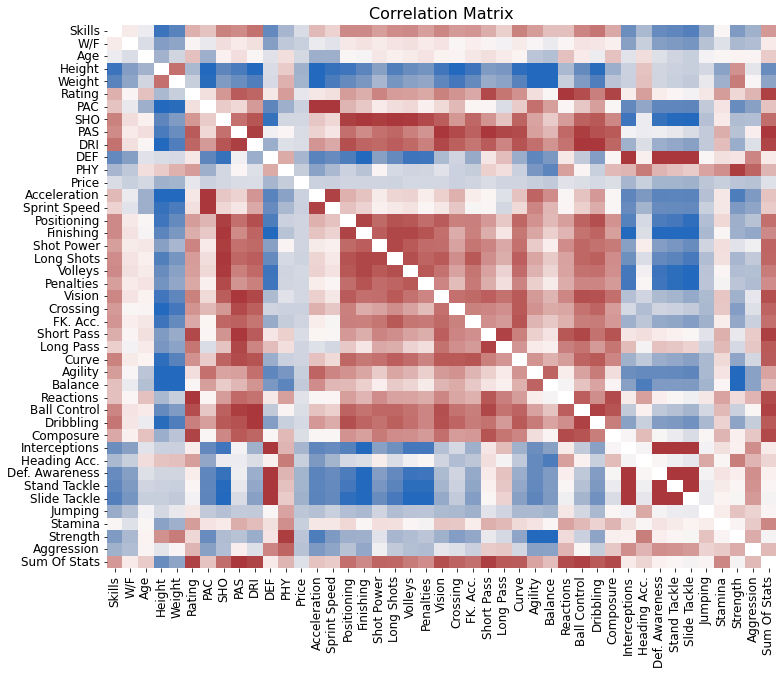

In [165]:
# Построим матрицу корелляции между признаками
mask = df.corr()
np.fill_diagonal(mask.values, np.nan)
plt.figure(figsize=(12, 10))
sns.heatmap(mask, cmap='vlag', cbar=False, annot=False, robust = True)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Вывод
- Матрица корелляции дает хорошее общее представление о данных, но ее не очень удобно применять, так как на ней слишком много малозначимой информации, особенно при большом количестве признаков. Поэтому нужно более точечно посмотреть, с чем более всего коррелирует цена на карточку.

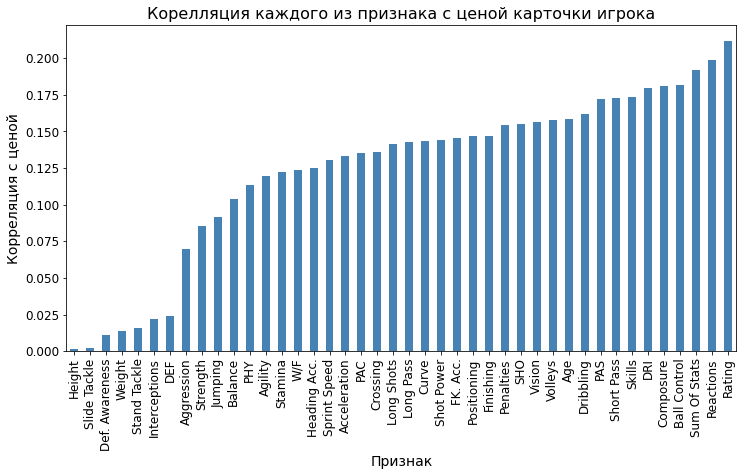

In [166]:
# Посчитаем корелляцию каждого признака с ценой карточки игрока
plt.figure(figsize=(12, 6))
correlation_with_price = df.corr()['Price'].drop('Price').sort_values()
correlation_with_price.plot(kind='bar', color='steelblue')
plt.title('Корелляция каждого из признака с ценой карточки игрока', fontsize=16)
plt.xlabel('Признак', fontsize=14)
plt.ylabel('Корреляция с ценой', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Вывод
- Наиболее кореллируемыми с ценой признаками являются Rating, Skills, Reactions и Sum Of stats. Однако в целом кореллляция не очень высока и не превышает 0.25 для отдельного признака. Поэтому будем выявлять наиболее значимые факторы, влияющие на цены футболистов при помощи гипотез

# Проверка гипотез

**Введение**: Цель нашего проекта - с помощью данных посмотреть на то, какие характеристики карточек сильнее всего влиют на рыночные цены футболистов в игре. Поэтому наши гипотезы будут построены по следующему принципу: мы выдвигаем гипотезу о том, что какая то конкретная характеристика должна влиять на цены карты футболиста, а далее с помощью самых разных тестов мы проверяем, действительно ли наша гипотеза верна, или же мы можем отвергнуть её. Так, мы сможем выявить существенные признаки для наших карточек, либо же исключить те признаки, которые влиять на цену будут незначительно.

Во всех гипотезах возьмём уровень значимости = 5%

In [192]:
alpha = 0.05

**1) Гипотеза 1:** Выше было выдвинута гипотеза о том, что игроки с альтернативной позицией должны стоить дороже, так как интуитивно кажется, что на карточки, у которых есть альтернативная позиция, спрос со стороны игроков должен быть выше, чем на карточки только с одной главной позицией, так как таких игроков можно использовать на разных позициях, отчего их ценность для игрока растёт. Проверим данную интуицию на реальных данных. Для этого сформулируем нашу первую нулевую гипотезу так: стоимость игроков без альтернативных позиций равна стоимости игроков, умеющих играть на разных позициях; альтернативная гипотеза: карточки с разными позициями дороже карточек с одной позицией.

$$
\begin{aligned}
& H_0: \mu_{alt} = \mu_{notalt} \\
& H_А: \mu_{alt} > \mu_{notalt}
\end{aligned}
$$

Для того, чтобы выбрать тест, нужно сначала разобраться с распределением нашей выборки

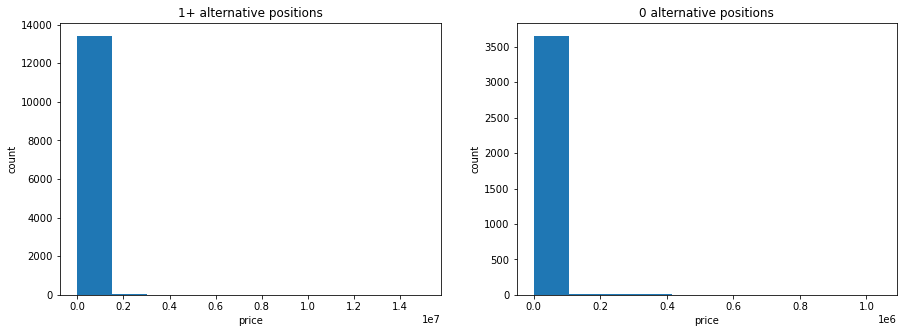

In [199]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist(df[df['Alt. Position'] == '1+']['Price'])
plt.xlabel('price')
plt.ylabel('count')
plt.title('1+ alternative positions')
plt.subplot(1, 2, 2)
plt.hist(df[df['Alt. Position'] == '0']['Price'])
plt.xlabel('price')
plt.ylabel('count')
plt.title('0 alternative positions')
plt.show()

Выборки совсем не нормальны, но наблюдений много, поэтому применим обычный z-test:
$$
z_{obs} = \frac{\bar{X} - \bar{Y}}{\sqrt{\frac{s_x^2}{n_x} + \frac{s_y^2}{n_y}}} \sim_{asy} N(0, 1)
$$

In [201]:
# Считаем Z наблюдаемое
X_bar, Y_bar = np.mean(df[df['Alt. Position'] == '1+']['Price']), np.mean(df[df['Alt. Position'] == '0']['Price'])
s_x, s_y = np.std(df[df['Alt. Position'] == '1+']['Price'], ddof = 1), np.std(df[df['Alt. Position'] == '0']['Price'], ddof = 1)
n_x, n_y = len(df[df['Alt. Position'] == '1+']['Price']), len(df[df['Alt. Position'] == '0']['Price'])
z_obs = (X_bar - Y_bar)/ np.sqrt(s_x ** 2 / n_x + s_y**2 / n_y)
print(f'Z наблюдаемое: {z_obs:.3f}')

Z наблюдаемое: 6.727


**Вывод:** z_obs оказалось сильно больше чем, z_crit при уровне значимости 5%, поэтому гипотеза о равенстве стоимостей отвергается. Но в этом моменте хорошо бы сделать некоторое замечание. Дело в том, что некоторые характеристики (например, наличие альтернативной позиции) появляется чаще всего у игроков с высоким рейтингом, и соответственно высокой ценой. То есть можно сделать вывод, что в таких случаях не альтернативная позиция влияет на стоимость игроков, а именно рейтинг игроков. Кажется, что это искажение, и нужно учесть, что игроки должны быть примерно равны по всем остальным признакам, чтобы понять, значимо ли влияние наличия альтернативной позиции на стоимость игроков. Поэтому начиная с этой гипотезы, далее будем проверять гипотезу на схожих выборках. В качестве мы должны несильно потерять, так как наблюдений в нашем датасете достаточно много, поэтому можно в зависимости от задачи выбирать разные подмножества игроков, основные признаки которых будут схожи.

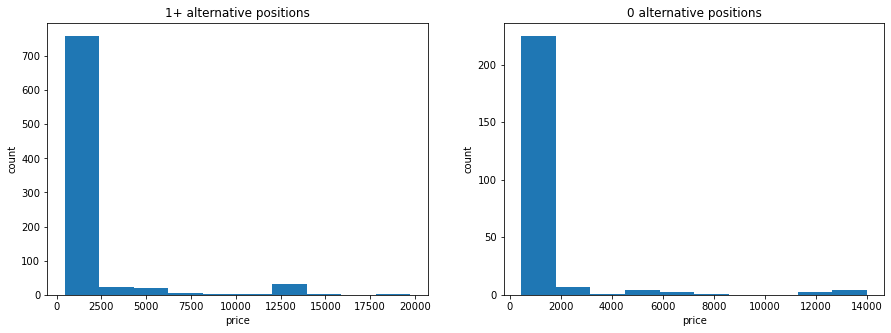

In [204]:
# Возьмём следующий очевидный фильтр: игрок рейтингом 75-82 из топ 5 лиг
df_top_5 = df[(df['Top5'] == 'Top-5 league') & (df['Rating'] >= 75) & (df['Rating'] <= 82)]

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist(df_top_5[df_top_5['Alt. Position'] == '1+']['Price'])
plt.xlabel('price')
plt.ylabel('count')
plt.title('1+ alternative positions')
plt.subplot(1, 2, 2)
plt.hist(df_top_5[df_top_5['Alt. Position'] == '0']['Price'])
plt.xlabel('price')
plt.ylabel('count')
plt.title('0 alternative positions')
plt.show()

Аналогично прошлому пункту, выборки совсем не нормальные, поэтому также используем z-тест

In [208]:
X_bar, Y_bar = np.mean(df_top_5[df_top_5['Alt. Position'] == '1+']['Price']), np.mean(df_top_5[df_top_5['Alt. Position'] == '0']['Price'])
s_x, s_y = np.std(df_top_5[df_top_5['Alt. Position'] == '1+']['Price'], ddof = 1), np.std(df_top_5[df_top_5['Alt. Position'] == '0']['Price'], ddof = 1)
n_x, n_y = len(df_top_5[df_top_5['Alt. Position'] == '1+']['Price']), len(df_top_5[df_top_5['Alt. Position'] == '0']['Price'])
z_obs = (X_bar - Y_bar)/ np.sqrt(s_x ** 2 / n_x + s_y ** 2 / n_y)
print(f'Z наблюдаемое: {z_obs:.3f}')

Z наблюдаемое: 1.422


**Вывод:** z_obs меньше z критического, а значит гипотеза не отвергается. Получили совершенно другой вывод. При дополнительных ограничениях на игроков, мы получили вывод, что гипотеза о равенстве не отвергается. Проверим ту же гипотезу для игроков не из топ-5 лиг.

In [211]:
# Возьмём следующий фильтр: игрок рейтингом 65-75 не из топ 5 лиг
df_not_top_5 = df[(df['Top5'] == 'Not top-5, not Icon') & (df['Rating'] >= 65) & (df['Rating'] <= 75)]

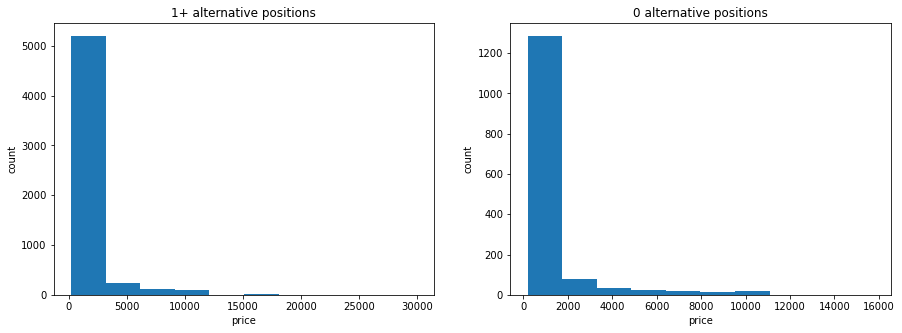

In [212]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist(df_not_top_5[df_not_top_5['Alt. Position'] == '1+']['Price'])
plt.xlabel('price')
plt.ylabel('count')
plt.title('1+ alternative positions')
plt.subplot(1, 2, 2)
plt.hist(df_not_top_5[df_not_top_5['Alt. Position'] == '0']['Price'])
plt.xlabel('price')
plt.ylabel('count')
plt.title('0 alternative positions')
plt.show()

Выборки все также ненормальные (пора бы уже привыкнуть...)

In [216]:
X_bar, Y_bar = np.mean(df_not_top_5[df_not_top_5['Alt. Position'] == '1+']['Price']), np.mean(df_not_top_5[df_not_top_5['Alt. Position'] == '0']['Price'])
s_x, s_y = np.std(df_not_top_5[df_not_top_5['Alt. Position'] == '1+']['Price'], ddof = 1), np.std(df_not_top_5[df_not_top_5['Alt. Position'] == '0']['Price'], ddof = 1)
n_x, n_y = len(df_not_top_5[df_not_top_5['Alt. Position'] == '1+']['Price']), len(df_not_top_5[df_not_top_5['Alt. Position'] == '0']['Price'])
z_obs = (X_bar - Y_bar)/ np.sqrt(s_x ** 2 / n_x + s_y ** 2 / n_y)
print(f'Z наблюдаемое: {z_obs:.3f}')

Z наблюдаемое: 1.814


**Вывод:** z_obs меньше z критического, значит для таких данных гипотеза тоже не отвергается. Кроме того, проверка гипотеза на разных подвыборках также показало, насколько сильно влияение рейтинга на цену игрока, о чем и говорилось ранее

**Гипотеза 2:** Также в игре есть множество заданий и сборок игроков, которые предполагают использование игроков определенных лиг и национальностей. Как мы видели при визуализации, в престижных лигах наблюдалась повышенная цена. Соответственно цены на игроков с топовыми лигами могут быть в среднем выше, чем игроков не из престижной лиги, даже если характеристики игроков в среднем похожи. Мы хотим проверить данное утверждение с помощью перестановочного теста. Для этого сформулируем нулевую гипотезу следующим образом: факт принадлежности к топ-5 лигам не влияет на стоимость игроков. Альтернативная гипотеза: стоимость игроков из топ-5 лиг и не оттуда не равна.

$$
\begin{aligned}
& H_0: \mu_{top5} = \mu_{nottop5} \\
& H_А: \mu_{top5} \neq \mu_{nottop5}
\end{aligned}
$$

In [222]:
df_per = df[['Price', 'Top5']][df['Top5'] != 'Icon']
df_per

,Price,Top5
0,3443000,Top-5 league
1,3113000,Top-5 league
3,2468000,Top-5 league
4,3140000,Top-5 league
5,8250000,Top-5 league
...,...,...
18991,200,"Not top-5, not Icon"
18992,200,"Not top-5, not Icon"
18993,200,"Not top-5, not Icon"
18994,200,"Not top-5, not Icon"


In [224]:
# Фиксируем зерно
np.random.seed(42)

# Разница средних по данным выборкам
delta = np.mean(df[df['Top5'] == 'Top-5 league']['Price']) - np.mean(df[df['Top5'] == 'Not top-5, not Icon']['Price'])

# Количество перестановок
n_per = 10000

# Здесь будут храниться разницы средних при перестановках
deltas_per = []

for i in range(n_per):
    df_per['Top5'] = np.random.permutation(df_per['Top5'])
    delta_per = df_per[df_per['Top5'] == 'Top-5 league']['Price'].mean() - df_per[df_per['Top5'] == 'Not top-5, not Icon']['Price'].mean()
    
    deltas_per.append(delta_per)
    
# Считаем P_value, как удвоенный минимум из долю перемешанных разниц средних,
# превышающих и не превышающих средних в данных наблюдениях
pvalue = 2 * min(np.mean(np.array(deltas_per) <= delta), np.mean(np.array(deltas_per) >= delta))

print(f'P_value = {pvalue}')


if pvalue > alpha:
    print('Статистический вывод: H_0 не отвергается')
else:
    print('Статистический вывод: H_0 отвергается в пользу H_A')

P_value = 0.0
Статистический вывод: H_0 отвергается в пользу H_A


**Вывод:** Цена игроков из самых престижных лиг не равна цене игроков из других лиг. Попробуем теперь сделать уточнение, и посмотреть на разницу средних стоимостей игроков игроков со схожим рейтингом и классом карточки.  

In [227]:
# Фиксируем зерно
np.random.seed(42)

# Берём схожие выборки. Здесь фильтр: золотые карточки с рейтингом меньше 83
df_per = df[(df['Class'] == 'Gold') & (df['Rating'] <= 82)]

# Разница средних по данным выборкам
delta = np.mean(df_per[df_per['Top5'] == 'Top-5 league']['Price']) - np.mean(df_per[df_per['Top5'] == 'Not top-5, not Icon']['Price'])

# Количество перестановок
n_per = 10000

# Здесь будут храниться разницы средних при перестановках
deltas_per = []

for i in range(n_per):
    df_per['Top5'] = np.random.permutation(df_per['Top5'])
    delta_per = df_per[df_per['Top5'] == 'Top-5 league']['Price'].mean() - df_per[df_per['Top5'] == 'Not top-5, not Icon']['Price'].mean()
    
    deltas_per.append(delta_per)
    
# Считаем P_value, как удвоенный минимум из долю перемешанных разниц средних,
# превышающих и не превышающих средних в данных наблюдениях
pvalue = 2 * min(np.mean(np.array(deltas_per) <= delta), np.mean(np.array(deltas_per) >= delta))

print(f'P_value = {pvalue}')

if pvalue > alpha:
    print('Статистический вывод: H_0 не отвергается')
else:
    print('Статистический вывод: H_0 отвергается в пользу H_A')

P_value = 0.0
Статистический вывод: H_0 отвергается в пользу H_A


In [228]:
# Фиксируем зерно
np.random.seed(42)

# Берём схожие выборки. Здесь фильтр: серебряные карточки 
# (ставить ограничение по рейтингам не имеет смысла, так как здесь у всех игроков рейтинг уже мал)
df_per = df[df['Class'] == 'Silver']

# Разница средних по данным выборкам
delta = np.mean(df_per[df_per['Top5'] == 'Top-5 league']['Price']) - np.mean(df_per[df_per['Top5'] == 'Not top-5, not Icon']['Price'])

# Количество перестановок
n_per = 10000

# Здесь будут храниться разницы средних при перестановках
deltas_per = []

for i in range(n_per):
    df_per['Top5'] = np.random.permutation(df_per['Top5'])
    delta_per = df_per[df_per['Top5'] == 'Top-5 league']['Price'].mean() - df_per[df_per['Top5'] == 'Not top-5, not Icon']['Price'].mean()
    
    deltas_per.append(delta_per)
    
# Считаем P_value, как удвоенный минимум из долю перемешанных разниц средних,
# превышающих и не превышающих средних в данных наблюдениях
pvalue = 2 * min(np.mean(np.array(deltas_per) <= delta), np.mean(np.array(deltas_per) >= delta))

print(f'P_value = {pvalue:.3f}')

if pvalue > alpha:
    print('Статистический вывод: H_0 не отвергается')
else:
    print('Статистический вывод: H_0 отвергается в пользу H_A')

P_value = 0.001
Статистический вывод: H_0 отвергается в пользу H_A


In [230]:
# Фиксируем зерно
np.random.seed(42)

# Берём схожие выборки. Здесь фильтр: бронзовые карточки 
# (ставить ограничение по рейтингам не имеет смысла, так как здесь у всех игроков рейтинг уже мал)
df_per = df[df['Class'] == 'Bronze']

# Разница средних по данным выборкам
delta = np.mean(df_per[df_per['Top5'] == 'Top-5 league']['Price']) - np.mean(df_per[df_per['Top5'] == 'Not top-5, not Icon']['Price'])

# Количество перестановок
n_per = 10000

# Здесь будут храниться разницы средних при перестановках
deltas_per = []

for i in range(n_per):
    df_per['Top5'] = np.random.permutation(df_per['Top5'])
    delta_per = df_per[df_per['Top5'] == 'Top-5 league']['Price'].mean() - df_per[df_per['Top5'] == 'Not top-5, not Icon']['Price'].mean()
    
    deltas_per.append(delta_per)
    
# Считаем P_value, как удвоенный минимум из долю перемешанных разниц средних,
# превышающих и не превышающих средних в данных наблюдениях
pvalue = 2 * min(np.mean(np.array(deltas_per) <= delta), np.mean(np.array(deltas_per) >= delta))

print(f'P_value = {pvalue}')

if pvalue > alpha:
    print('Статистический вывод: H_0 не отвергается')
else:
    print('Статистический вывод: H_0 отвергается в пользу H_A')

P_value = 0.0
Статистический вывод: H_0 отвергается в пользу H_A


**Вывод:** мы пришли к крайне увлекательному выводу. Получается, что, если смотреть всех игроков без исключений, то цена игроков из Топ-5 лиг не равна ценам игроков из более слабых футбольных лиг. Однако при проведении дополнительных тестов для более узких выборок были выведены следующие закономерности. Кроме того, даже если разбить данные, и проверить гипотезу на разных классах карточек, то мы приходим к такому же вывожу, что данный признак статистически значим, поэтому для такого класса карточек средняя стоимость игроков из Топ-5 лиг **не равна** средней стоимости игроков не из Топ-5 лиг 

**Гипотеза 3:** В Fifa 23, как мы уже поняли, есть свой трансферный рынок, и как на реальном трансферном рынке, на разные типы игроков здесь есть своя цена, основанная на спросе и предложении. Выше мы выявили при помощи диаграммы, что нападающих стоимость должна быть выше, чем у полузащитников и защитников. Так происходит ввиду самых различных причин, начиная от того, что в игре важнее всего забивать голы, а нападающие это делают лучше, и заканчивая тем, что зачастую нападающие в реальной жизни намного известнее, чем игроки из любой другой зоны игры, благодаря тому, что именно нападающие забивают голы и радуют болельщиков. В связи с этим, хочется проверить следующую гипотезу. Сформулируем H_0 следующим образом: средняя цена игроков из разных позиций равна, против альтернативы что цены на игроков из разных зон не равны. Так как нам нужно проверить гипотезу для сразу 3 средних, то будет удобно построить доверительный интервал для среднего и проверить 3 интервала на пересечение. Для больше продвинутости теста, построим доверительные интервалы с помощью обратного перцентильного бутстрэпа. 

$$
\begin{aligned}
& H_0: \mu_{att} = \mu_{mid} = \mu_{def} \\
& H_А: иначе
\end{aligned}
$$

In [231]:
# Напишем функцию, которая будем считать доверительный интервал для мат. ожидания с помощью обратного перцентильного бутстрапа
def make_CI_rev_boot(X):
    # Фиксируем зерно
    np.random.seed(42)

    # Количество симуляций возьмём 10000
    n_sim = 10000

    # Бустрапирование данных
    X_boot = np.random.choice(X, size=(n_sim, len(X)))
    
    # Значение среднего по исходной выборке 
    X_mean = np.mean(X)
    
    # Значение средних в бутстрапированных данных
    X_boot_mean = np.mean(X_boot, axis=1)
    
    # Значение разницы средних
    R_hat = X_boot_mean - X_mean
    
    # Левый и правый квантили разниц бустрап и данного средних
    q_L, q_R = np.quantile(R_hat, alpha/2), np.quantile(R_hat, 1 - alpha/2)
    
    # Итоговый CI для мат. ожидания 
    CI = [round(X_mean - q_R, 2), round(X_mean - q_L, 2)]
    
    return CI

In [232]:
# Фиксируем зерно
np.random.seed(42)

attackers = make_CI_rev_boot(df[df['Zone'] == 'ATT']['Price'])
middles = make_CI_rev_boot(df[df['Zone'] == 'MID']['Price'])
defenders = make_CI_rev_boot(df[df['Zone'] == 'DEF']['Price'])

print(f'CI мат.ожидания цен нападающих: {attackers}')
print(f'CI мат.ожидания цен полузащитников: {middles}')
print(f'CI мат.ожидания цен защитников: {defenders}')

CI мат.ожидания цен нападающих: [34642.7, 63193.62]
CI мат.ожидания цен полузащитников: [8549.82, 13417.04]
CI мат.ожидания цен защитников: [5194.83, 7786.9]


**Вывод:** Подвердились те предположения, что были выше о ценах игроках на разных футбольных зонах. Цены на нападающих в игре значительно превышают цены на полузащитников и защитников, в то время как цены на полузащитников совсем незначительно превышают цену на защитников. Теперь по традиции проверим данную гипотезу для более узких выборок

In [233]:
# Фиксируем зерно
np.random.seed(42)

# Возьмём следующую выборку: уберем все цветные (потенциально более дорогие) карточки, оставим только золотые обычные карты
df_rev_boot = df[(df['Class'] == 'Gold') & (df['Card Type'] == 'Non-Inform')]

attackers = make_CI_rev_boot(df_rev_boot[df_rev_boot['Zone'] == 'ATT']['Price'])
middles = make_CI_rev_boot(df_rev_boot[df_rev_boot['Zone'] == 'MID']['Price'])
defenders = make_CI_rev_boot(df_rev_boot[df_rev_boot['Zone'] == 'DEF']['Price'])

print(f'CI мат.ожидания цен нападающих: {attackers}')
print(f'CI мат.ожидания цен полузащитников: {middles}')
print(f'CI мат.ожидания цен защитников: {defenders}')

CI мат.ожидания цен нападающих: [1441.87, 3351.54]
CI мат.ожидания цен полузащитников: [1355.58, 1795.47]
CI мат.ожидания цен защитников: [1248.92, 1655.96]


**Вывод:** Как видим, в случае если уберём цветные карточки и оставим только обычные золотые карты, то, во-первых, цены для всех игроков ощутимо снижаются. Так, например, краевые значения CI для нападающих упали почти в 15 раз. Это позволяет нам делать вывод, что тип карточки - это очень значимый признак, влияющий на цену игрока. Во-вторых, Все доверительные интервалы пересекеклись в данном случае, поэтому мы не отвергаем гипотезу о равенстве цен игроков из разных позиций.

**Гипотеза 4:** Fifa 23 - это видеогра, и как и в любой видеоигры, здесь очень хорошо работают внутриигровые скрипты. Ранее мы хотели проверить, действительно ли быстрые футболисты ценятся в игре больше, чем физически сильные футболисты. Это может объясняьтся тем, что многие профессиональные игроки любят играть маленькими и быстрыми нападающими, нежели нападающими, у которых очень хорошие показатели удара или паса, просто потому что в данной игре скорость и дриблинг дают возможность забивать уйму голов, причем самым простыми способами, тогда как тяжёлыми, высокими нападающими играть крайне тяжело, несмотря на то, что их физические показатели лучше, чем у маленьких и быстрых. Нашу следующую основную гипотезу сформулируем следующим образом: цена на нападающего не зависит от стиля его игры (быстрый-маленький/высокий-мощный), против альтернативы о том, что цена на маленьких и быстрых выше, чем для другого типажа футболистов  


$$
\begin{aligned}
& H_0: \mu_{fast} = \mu_{strong} \\
& H_А: \mu_{fast} > \mu_{strong}
\end{aligned}
$$

Для начала нужно определиться с критериями для отбора футболистов с нужными признаками. Попробуем подобрать значения по опыту игры.

In [235]:
# Выбираем золотых быстрых надающих со следующими показателями: 
# Рост меньше 72 дюйма (182 см); Скорость выше 90; Физическая сила меньше 90
fast = df[(df['Height'] < 72) & (df['PAC'] > 90) & (df['PHY'] < 90) & (df['Zone'] == 'ATT') & (df['Class'] == 'Gold')]['Price']

# Выбираем золотых сильных надающих со следующими показателями:
# Рост меньше 73 дюйма (182 см); Физическая сила больше 82; Скорость меньше 90
strong = df[(df['Height'] > 72) & (df['PHY'] > 82) & (df['PAC'] < 90) & (df['Zone'] == 'ATT') & (df['Class'] == 'Gold')]['Price']

Посмотрим на распределение данных, чтобы выбрать подходящий тест

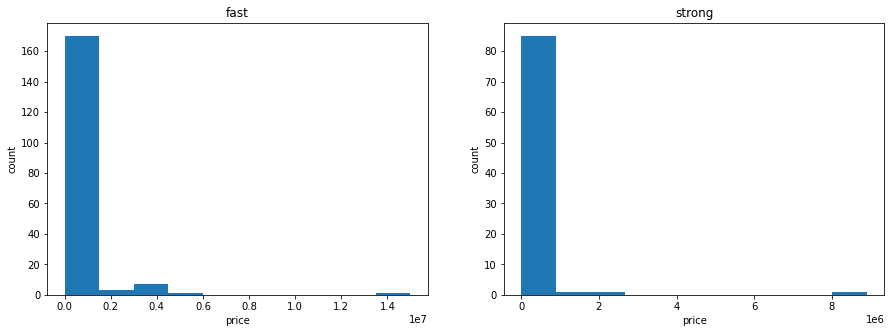

In [236]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.hist(fast)
plt.xlabel('price')
plt.ylabel('count')
plt.title('fast')
plt.subplot(1, 2, 2)
plt.hist(strong)
plt.xlabel('price')
plt.ylabel('count')
plt.title('strong')
plt.show()

Выборки не нормальные, но наблюдений много, значит z-тест. В этот раз воспользуемся готовой функцией

In [238]:
from statsmodels.stats.weightstats import ztest

z_obs, pvalue = ztest(fast, strong, alternative='larger')

print(f'P_value = {pvalue:.3f}')

if pvalue > alpha:
    print('Статистический вывод: H_0 не отвергается')
else:
    print('Статистический вывод: H_0 отвергается в пользу H_A')

P_value = 0.034
Статистический вывод: H_0 отвергается в пользу H_A


**Вывод:** Получили, что мы были правы, H0 отвергается, а значит стоимость маленьких, быстрых игроков по-настоящему выше, чем у более тяжёлого типажа футболистов. Значит у карточек в фифе есть еще один значимый признак, исходя из комбинации различных рейтингов. Так, мы получаем, что низкий рост и высокая скорость - это комбинация, которая значительно влияет на рыночную цену футболиста.

**Гипотеза 5:** Как мы заметили в гипотезе 3, с самыми дорогими типами карточек, цветные карточки в этой игре ценятся очень-очень высоко. Само собой цветная карточка - понятие очень широкое, но на самом деле, их можно разделить на две категории: __кумиры__ и __премиальные__ карточки современных игроков. Про кумиров есть описание выше - это легенды футбола, закончившие карьеру; премиальные карточки - это улучшенные карты игроков, которые они получают обычно за хорошие выступления в реальном футболе (либо во время каких-то иных футбольных событиях). В столбчатой диаграмме мы выявили, что кумиры и премиум-карточки должны стоить примерно одинаково дорого. Поэтому данной гипотезой мы хотим проверить, отличаются ли цены на карточки этих двух типов или нет. Сделаем проверку с помощью наивного бутстрэпа


$$
\begin{aligned}
& H_0: \mu_{icons} = \mu_{premium} \\
& H_А: \mu_{icons} \neq \mu_{premium}
\end{aligned}
$$

In [242]:
# Выбираем только икон
icons = df[df['Top5'] == 'Icon']['Price']

# Выбираем только цветные карточки футболистов
premium = df[(df['Top5'] != 'Icon') & (~df['Card Type'].isin(['Non-Inform', 'Libertadores Base', 'Sudamericana']))]['Price']

In [267]:
# Функция, считающая p_value и CI при помощи наивного бутстрапа
def naive_bootstrap(icons, premium, n_sim = 10 ** 4):
    icons_boot = np.random.choice(icons, size=(n_sim, len(icons)))
    premium_boot = np.random.choice(premium, size=(n_sim, len(icons)))
    delta_hat = np.mean(icons) - np.mean(icons)
    delta_boot = np.mean(icons_boot, axis = 1) - np.mean(premium_boot, axis = 1)
    q_l, q_r = np.percentile(delta_boot, q = 2.5), np.percentile(delta_boot, q = 97.5)
    p_value = 2 * min(np.mean((np.array(delta_boot) > 0)), np.mean((np.array(delta_boot) <= 0)))
    return (p_value, q_l, q_r)

In [268]:
np.random.seed(42)
p_value, q_l, q_r = naive_bootstrap(icons, premium)
print(f'p_value = {p_value}')
print(f'95% CI: {q_l, q_r}')

p_value = 0.0002
95% CI: (97308.85869565216, 378979.99999999977)


P_value получился почти нулевой, что говорит о том, что цена на иконы серьёзно отличается от цен на цветные карточки. С помощью доверительных интервалов проверим, какая карточка всё-таки дороже.

**Вывод:** P_value получился почти нулевой, что говорит о том, что цена на иконы серьёзно отличается от цен на цветные карточки. С помощью доверительных интервалов мы приходим к следующему уверенному выводу, что цены на икон ощутимо дороже цен на просто премиум карточек современных футболистов. Сделаем замечание, что по своей силе и уровню игры данные карточки полностью сопоставимы, а значит мы точно понимаем, что именно тип карточки (икона или премиум карточка) так сильно влияет на цену футболистов.

**Гипотеза 6:** При проведении визуального анализа данных, мы предположили, что есть прямая связь между количеством игроков в стране и ценой карточки представителя данной нации. Сейчас мы проверим гипотезу о наличии взаимосвязии между количеством игроков в стране или в национальном чемпионате и ценой карточки представителя данной нации или лиги. Проверку будем производить с помощью корреляции Спирмена 

In [253]:
# Корреляция между позицией лиги по количеству игроков и позицией по средней цене игроков

df_mean_price_per_league = pd.DataFrame((df.groupby(by = 'League')['Price'].mean()).sort_values(ascending = False))
df_count_per_league = pd.DataFrame((df.groupby(by = 'League')['Name'].count()).sort_values(ascending = False))
merged_df = df_mean_price_per_league.merge(df_count_per_league, left_index=True, right_index=True)
merged_df.columns = ['mean_price', 'number_of_players']
merged_df['mean_price_rank'] = merged_df['mean_price'].rank(ascending=False, method='min')
merged_df['num_players_rank'] = merged_df['number_of_players'].rank(ascending=False, method='min')
S = np.sum((merged_df['mean_price_rank'] - merged_df['num_players_rank']) ** 2)
ro = 1 - 6 * S / (merged_df.shape[0] ** 3 - merged_df.shape[0])
print(f'Коэффициент корреляции Спирмена: {ro:.3f}')

Коэффициент корреляции Спирмена: 0.303


Видим, что корреляция невысокая. Попробуем визуализировать эту взаимосвязь

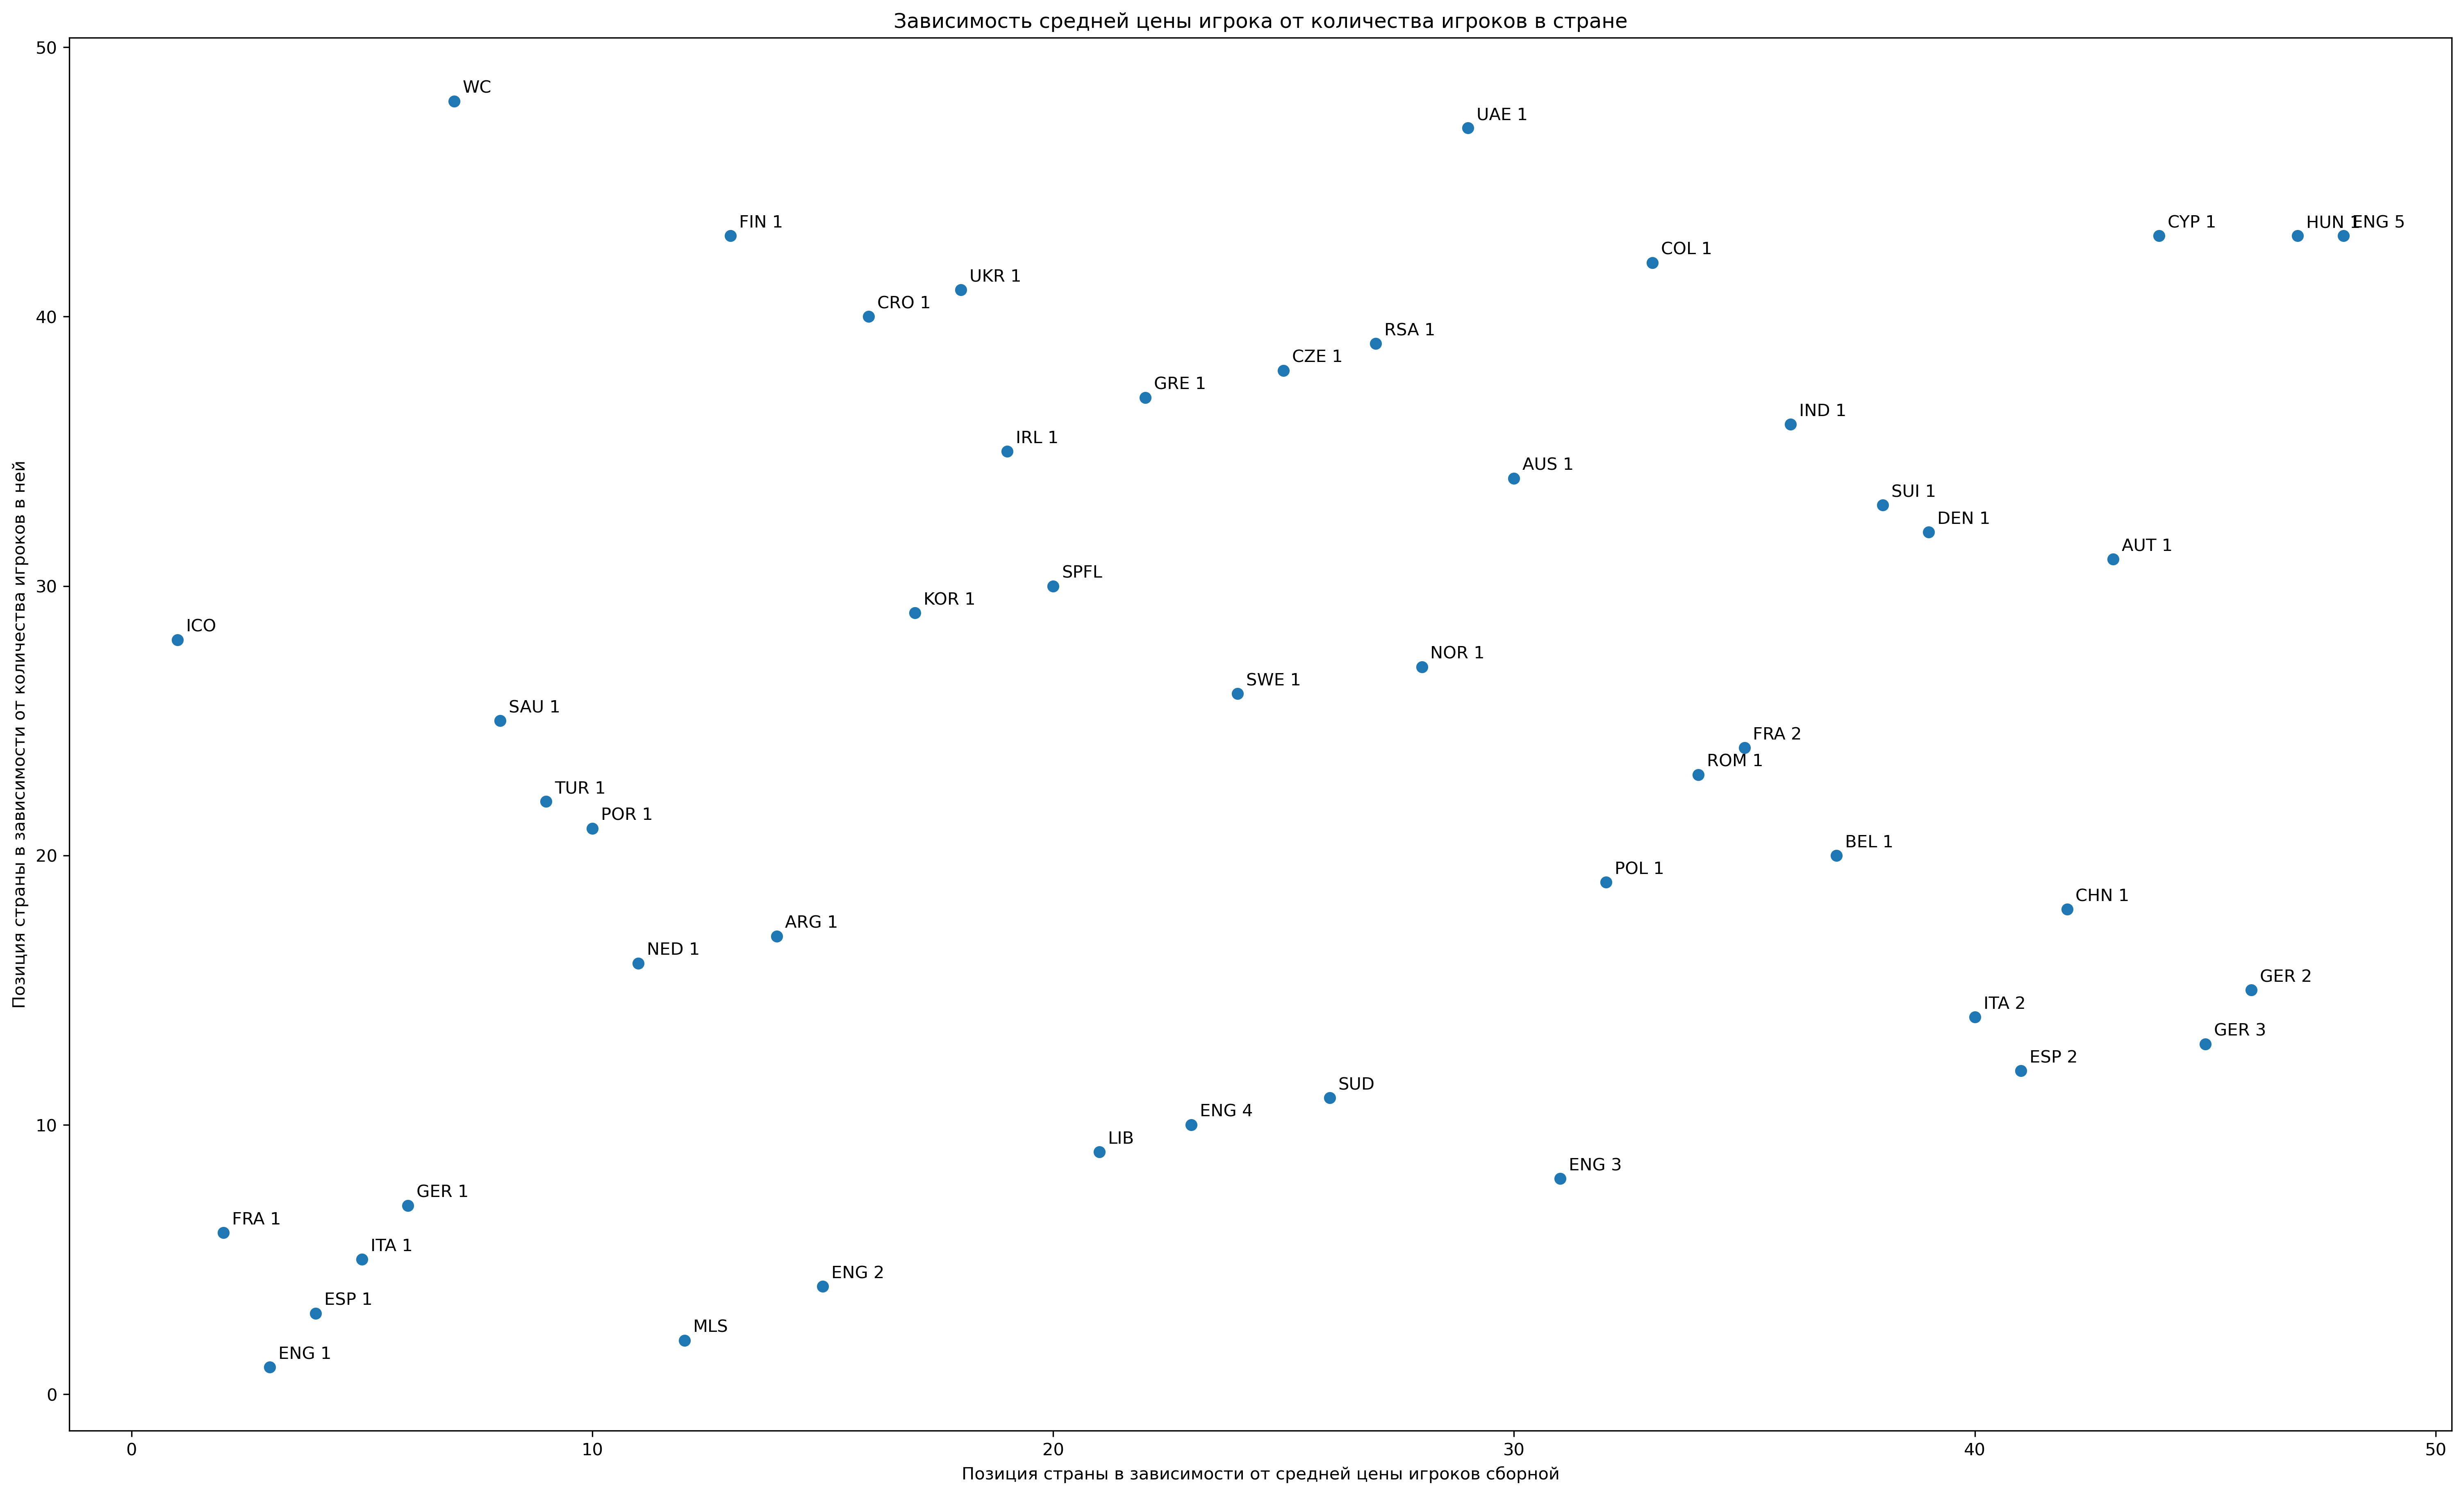

In [256]:
plt.figure(figsize = (25, 15), dpi=300)
plt.scatter(merged_df['mean_price_rank'], merged_df['num_players_rank'])
for i in merged_df.index:
    plt.annotate(i, (merged_df.loc[i][2], merged_df.loc[i][3]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Позиция страны в зависимости от средней цены игроков сборной')
plt.ylabel('Позиция страны в зависимости от количества игроков в ней')
plt.title('Зависимость средней цены игрока от количества игроков в стране')
plt.show()

**Вывод:** На диаграмме еще более отчётливо видно, что для лиг показатели по количеству игроков в ней и средней ценой игроков в ней несильно взаимосвязаны. Теперь проведём такой же анализ по странам

In [258]:
# Корреляция между позицией страны по количеству игроков и позицией по средней ценой игроков

df_mean_price_per_nation = pd.DataFrame((df.groupby(by = 'Nation')['Price'].mean()).sort_values(ascending = False))
df_count_per_nation = pd.DataFrame((df.groupby(by = 'Nation')['Name'].count()).sort_values(ascending = False))
merged_df = df_mean_price_per_nation.merge(df_count_per_nation, left_index=True, right_index=True)
merged_df.columns = ['mean_price', 'number_of_players']
merged_df['mean_price_rank'] = merged_df['mean_price'].rank(ascending=False, method='min')
merged_df['num_players_rank'] = merged_df['number_of_players'].rank(ascending=False, method='min')
S = np.sum((merged_df['mean_price_rank'] - merged_df['num_players_rank']) ** 2)
ro = 1 - 6 * S / (merged_df.shape[0] ** 3 - merged_df.shape[0])
print(f'Коэффициент корреляции Спирмена: {ro:.3f}')

Коэффициент корреляции Спирмена: 0.598


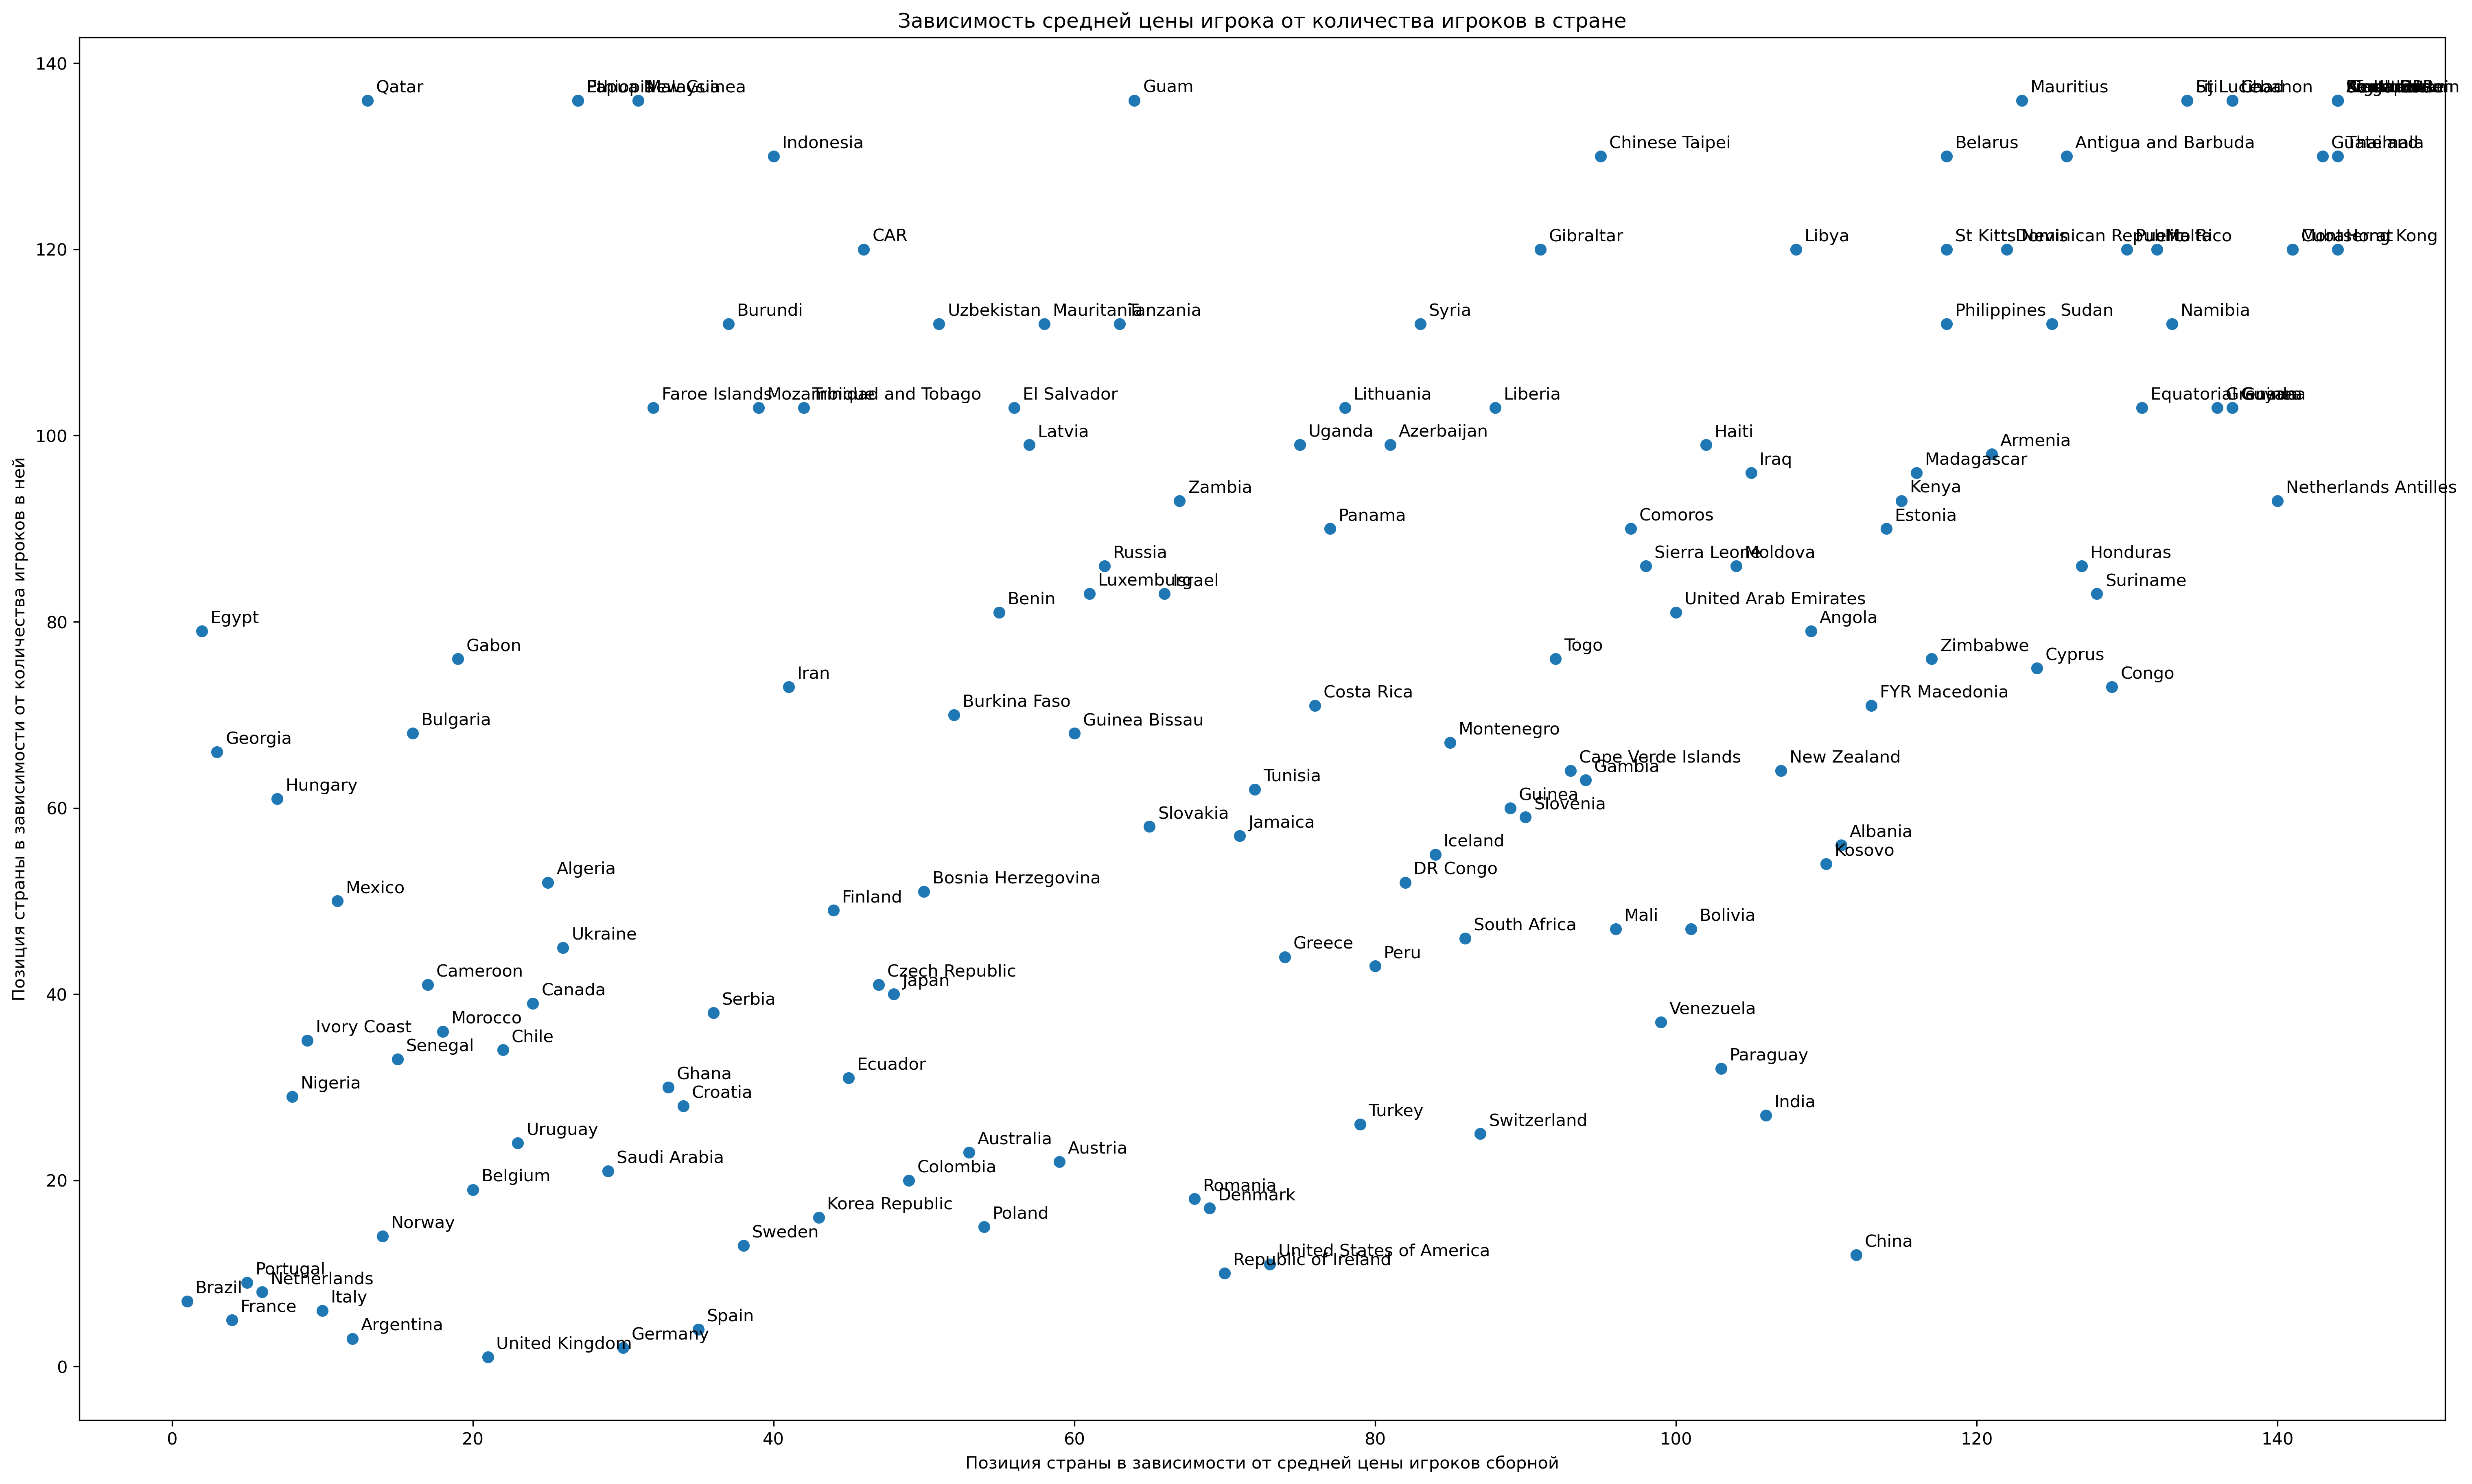

In [259]:
plt.figure(figsize = (25, 15), dpi=300)
plt.scatter(merged_df['mean_price_rank'], merged_df['num_players_rank'])
for i in merged_df.index:
    plt.annotate(i, (merged_df.loc[i][2], merged_df.loc[i][3]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Позиция страны в зависимости от средней цены игроков сборной')
plt.ylabel('Позиция страны в зависимости от количества игроков в ней')
plt.title('Зависимость средней цены игрока от количества игроков в стране')
plt.show()

**Вывод:** Здесь уже явно лучше видна зависимость количества игроков в стране от средней цены игроков данной нации. Это видно по высокому значению корреляции Спирмэна и при построении диаграммы рассеяния стран

## Кодирование данных

- Для дальнейшней работы с алгоритмами машинного обучения нам необходимо закодировать категориальные переменные
- В выборе между Label Encoding и One-hot-encoding был выбран метод One-hot-encoding, так как он более универсальный и не ранжирует признаки
- Наличие отдельного столбца под каждое из значений категориального признака позволяет алгоритму лучше работать с весами

In [ ]:
df_initial = df.copy()

categorical_columns = ['Card Type', 'Nation', 'Club', 'League', 'W/R', 'Foot', 'Height', 'Weight', 'Body Type', 'Position', 'Alt. Position']
df_categorical_encoded = pd.get_dummies(df[categorical_columns])

# Объединение закодированных столбцов с исходным DataFrame
df_encoded = pd.concat([df_initial, df_categorical_encoded], axis=1)

# Удаление исходных категориальных столбцов
df_encoded.drop(categorical_columns, axis=1, inplace=True)


In [ ]:
df_encoded

In [ ]:
df_encoded.to_csv('df_encoded.csv', index=False)
